# Regulatory Affairs of Road Accident Data 2020 India

# About Dataset
The data contains road accident information for 50 cities of India in the year 2020.

The data refers to Total Number of Road Accidents, Persons Killed and Injured. It also provides some other information like Number of Accidents per Lakh Population, Number of Accidents per Ten Thousand Vehicles, Number of Accidents per Ten Thousand Kms of Roads, Number of Persons Killed Per Lakh Population, Number of Persons Killed Per Ten Thousand Vehicles, Number of Persons Killed per Ten Thousand Kms of Roads, Number of Persons Injured per Lakh Population, Number of Persons Injured Per Ten Thousand Vehicles and Number of Persons Injured Per Ten Thousand Kms of Roads. Data of road accidents in India are collected by Transport Research Wing (TRW) of Ministry of Road Transport & Highways from the Police Headquarters of the various states, UTs and Million Plus cities in India through specially designated nodal officers(DGP/ADGP(Crime)/ADGP(Traffic)/ Director (State Crime Record Bureau) in a 19-item format devised under Asia Pacific Road Accidents Data(APRAD)/ Indian Road Accident Data(IRAD) project of the United Nations Economic and Social Commission for the Asia & the Pacific(UNESCAP).

Data source : https://data.gov.in/catalog/road-accidents-india-2020

# Columns:
Million plus cities : Contains the name of the cities

Cause Category: 5 primary category for classification of accidents ( Traffic Control, Junction, Road Features, Impacting Vehicle/Object, Weather Conditions)

Cause Subcategory: Further classifying the exact cause for the accident

Outcome of Incident: Indicating , injuries , deaths and accidents

Count: Count in Millions for each incident

## About Project

Business Problem : Analyze the cause of road accidents in Million Plus Cities in India. Identify patterns in causes and outcomes and visualize the distribution of accidents based on different categories.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Regulatory Affairs of Road Accident Data 2020 India.csv")
df

Million Plus Cities   Cause category        Cause Subcategory  \
0                   Agra  Traffic Control  Flashing Signal/Blinker   
1                   Agra  Traffic Control  Flashing Signal/Blinker   
2                   Agra  Traffic Control  Flashing Signal/Blinker   
3                   Agra  Traffic Control  Flashing Signal/Blinker   
4                   Agra  Traffic Control  Flashing Signal/Blinker   
...                  ...              ...                      ...   
9545               Vizaq          Weather              Sunny/Clear   
9546               Vizaq          Weather              Sunny/Clear   
9547               Vizaq          Weather              Sunny/Clear   
9548               Vizaq          Weather              Sunny/Clear   
9549               Vizaq          Weather              Sunny/Clear   

            Outcome of Incident   Count  
0            Greviously Injured     0.0  
1                  Minor Injury     0.0  
2                Persons Killed     0.0  
3                 Total Injured     0.0  
4     Total number of Accidents     0.0  
...                         ...     ...  
9545         Greviously Injured   561.0  
9546               Minor Injury   252.0  
9547             Persons Killed   176.0  
9548  Total number of Accidents  1207.0  
9549              Total Injured   813.0  

[9550 rows x 5 columns]

In [3]:
df.shape

(9550, 5)

In [4]:
df.fillna(0)

Million Plus Cities   Cause category        Cause Subcategory  \
0                   Agra  Traffic Control  Flashing Signal/Blinker   
1                   Agra  Traffic Control  Flashing Signal/Blinker   
2                   Agra  Traffic Control  Flashing Signal/Blinker   
3                   Agra  Traffic Control  Flashing Signal/Blinker   
4                   Agra  Traffic Control  Flashing Signal/Blinker   
...                  ...              ...                      ...   
9545               Vizaq          Weather              Sunny/Clear   
9546               Vizaq          Weather              Sunny/Clear   
9547               Vizaq          Weather              Sunny/Clear   
9548               Vizaq          Weather              Sunny/Clear   
9549               Vizaq          Weather              Sunny/Clear   

            Outcome of Incident   Count  
0            Greviously Injured     0.0  
1                  Minor Injury     0.0  
2                Persons Killed     0.0  
3                 Total Injured     0.0  
4     Total number of Accidents     0.0  
...                         ...     ...  
9545         Greviously Injured   561.0  
9546               Minor Injury   252.0  
9547             Persons Killed   176.0  
9548  Total number of Accidents  1207.0  
9549              Total Injured   813.0  

[9550 rows x 5 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9550 entries, 0 to 9549
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Million Plus Cities  9550 non-null   object 
 1   Cause category       9550 non-null   object 
 2   Cause Subcategory    9550 non-null   object 
 3   Outcome of Incident  9550 non-null   object 
 4   Count                9547 non-null   float64
dtypes: float64(1), object(4)
memory usage: 373.2+ KB


In [6]:
df["Outcome of Incident"].value_counts()

Outcome of Incident
Greviously Injured           2000
Minor Injury                 2000
Persons Killed               2000
Total number of Accidents    2000
Total Injured                1550
Name: count, dtype: int64

In [7]:
df.columns

Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident', 'Count'],
      dtype='object')

In [8]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident'],
      dtype='object')

In [9]:
for column in cat_cols:
    print(column, ": ",len(df[column].unique()), df[column].unique())

Million Plus Cities :  50 ['Agra' 'Ahmedabad' 'Allahabad(Prayagraj)' 'Amritsar' 'Asansol Durgapur'
 'Aurangabad' 'Bengaluru' 'Bhopal' 'Chandigarh' 'Chennai' 'Coimbatore'
 'Delhi' 'Dhanbad' 'Faridabad' 'Ghaziabad' 'Gwalior' 'Hyderabad' 'Indore'
 'Jabalpur' 'Jaipur' 'Jamshedpur' 'Jodhpur' 'Kannur' 'Kanpur' 'Khozikode'
 'Kochi' 'Kolkata' 'Kollam' 'Kota' 'Lucknow' 'Ludhiana' 'Madurai'
 'Mallapuram' 'Meerut' 'Mumbai' 'Nagpur' 'Nashik' 'Patna' 'Pune' 'Raipur'
 'Rajkot' 'Srinagar' 'Surat' 'Thiruvanthapuram' 'Thrissur'
 'Tiruchirapalli' 'Vadodra' 'Varanasi' 'Vijaywada city' 'Vizaq']
Cause category :  6 ['Traffic Control' 'Junction' 'Traffic Violation' 'Road Features'
 'Impacting Vehicle/Object' 'Weather']
Cause Subcategory :  35 ['Flashing Signal/Blinker' 'Others' 'Police Controlled' 'Stop Sign'
 'Traffic Light Signal' 'Uncontrolled' 'Four arm Junction'
 'Round about Junction' 'Staggered Junction' 'T' 'Y'
 'Driving on Wrong side'
 'Drunken Driving/ Consumption of alcohol and drug' 'Jumping Red

In [10]:
df.isnull().sum()

Million Plus Cities    0
Cause category         0
Cause Subcategory      0
Outcome of Incident    0
Count                  3
dtype: int64

In [11]:
df[df['Count'].isnull()]

Million Plus Cities            Cause category Cause Subcategory  \
7056             Gwalior  Impacting Vehicle/Object         Other Non   
7057             Gwalior  Impacting Vehicle/Object         Other Non   
7058             Gwalior  Impacting Vehicle/Object         Other Non   

     Outcome of Incident  Count  
7056  Greviously Injured    NaN  
7057      Persons Killed    NaN  
7058        Minor Injury    NaN

In [12]:
df.describe()

Count
count  9547.000000
mean    103.627632
std     275.189303
min       0.000000
25%       0.000000
50%      12.000000
75%      70.500000
max    3148.000000

In [13]:
df[(df['Million Plus Cities'] == 'Gwalior') & (df['Cause category'] == 'Impacting Vehicle/Object') & (df['Cause Subcategory'] == 'Other Non')]

Million Plus Cities            Cause category Cause Subcategory  \
7056             Gwalior  Impacting Vehicle/Object         Other Non   
7057             Gwalior  Impacting Vehicle/Object         Other Non   
7058             Gwalior  Impacting Vehicle/Object         Other Non   
7059             Gwalior  Impacting Vehicle/Object         Other Non   

            Outcome of Incident  Count  
7056         Greviously Injured    NaN  
7057             Persons Killed    NaN  
7058               Minor Injury    NaN  
7059  Total number of Accidents    0.0

In [14]:
df.loc[df['Count'].isnull(), 'Count'] = 0

In [15]:
df.to_csv("road_accidents_long.csv", index=False)

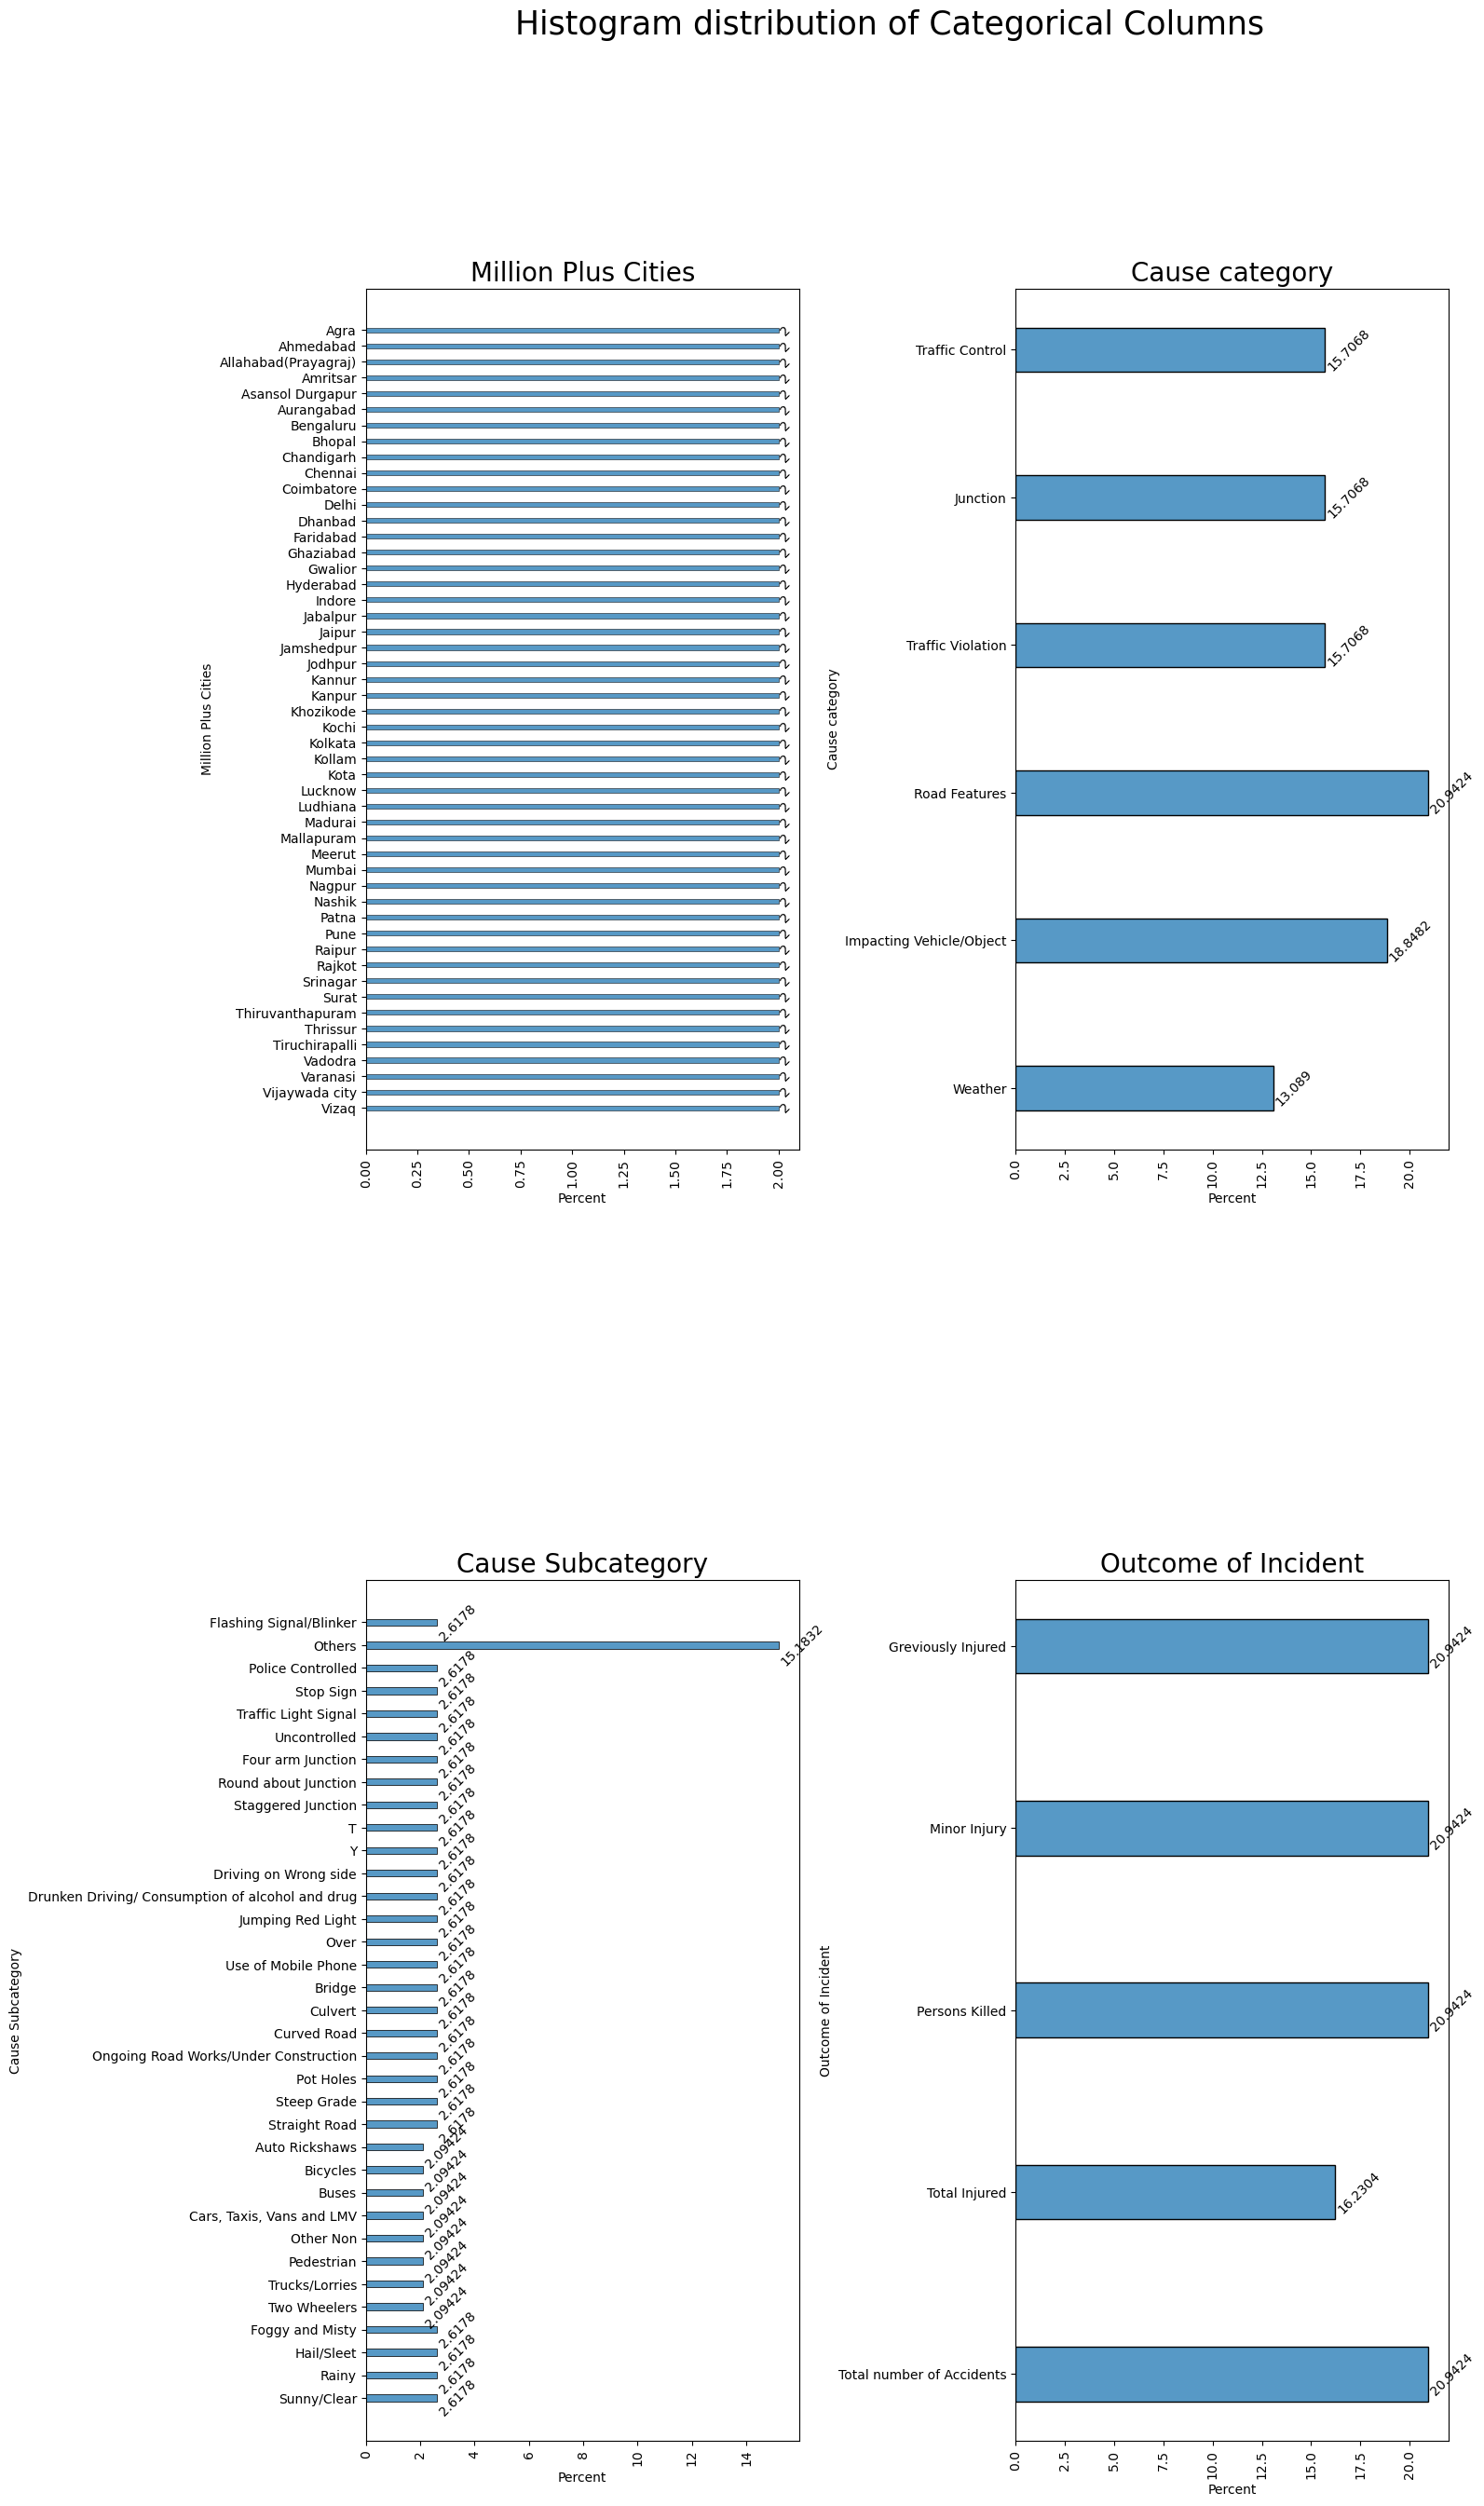

In [16]:
plt.figure(figsize=(15, 30))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle("Histogram distribution of Categorical Columns", fontsize=25)

ncols = 2

nrows = len(cat_cols) // ncols + (len(cat_cols) % ncols > 0)

for n, column in enumerate(cat_cols):
    ax = plt.subplot(nrows, ncols, n+1)
    ax.set_title(column, fontsize=20)
    
    sns.histplot(data=df, y=column, multiple="dodge", shrink=0.3, ax=ax, stat="percent")
    
    for container in ax.containers:
        ax.bar_label(container, rotation=45)
        
    plt.xticks(rotation=90)

In [17]:
total_accidents_mask = df[df['Outcome of Incident']=="Total number of Accidents"]

<Figure size 5000x1500 with 0 Axes>

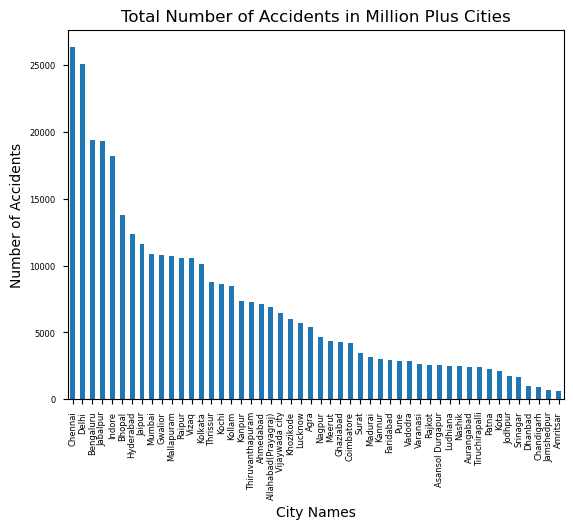

In [18]:
plt.figure(figsize=(50, 15))

cat_grp_accidents = total_accidents_mask.groupby(['Million Plus Cities']).agg('sum')[['Count']]\
    .sort_values(by='Count', ascending=False)

cat_grp_accidents.plot(kind="bar", legend=False, title="Total Number of Accidents in Million Plus Cities", xlabel='City Names', ylabel="Number of Accidents")

plt.tick_params(pad=5, labelsize=6)
plt.show()

In [19]:
cat_grp_accidents['percent'] = cat_grp_accidents.transform(lambda x: (x/x.sum()) * 100)
cat_grp_accidents

Count   percent
Million Plus Cities                    
Chennai               26334.0  7.472419
Delhi                 25068.0  7.113184
Bengaluru             19398.0  5.504290
Jabalpur              19356.0  5.492373
Indore                18216.0  5.168891
Bhopal                13770.0  3.907314
Hyderabad             12384.0  3.514029
Jaipur                11640.0  3.302915
Mumbai                10872.0  3.084990
Gwalior               10794.0  3.062858
Mallapuram            10704.0  3.037320
Raipur                10596.0  3.006674
Vizaq                 10590.0  3.004971
Kolkata               10098.0  2.865364
Thrissur               8784.0  2.492509
Kochi                  8622.0  2.446540
Kollam                 8466.0  2.402275
Kanpur                 7344.0  2.083901
Thiruvanthapuram       7284.0  2.066876
Ahmedabad              7110.0  2.017502
Allahabad(Prayagraj)   6912.0  1.961318
Vijaywada city         6432.0  1.825116
Khozikode              6018.0  1.707641
Lucknow                5676.0  1.610597
Agra                   5436.0  1.542495
Nagpur                 4638.0  1.316058
Meerut                 4350.0  1.234337
Ghaziabad              4248.0  1.205394
Coimbatore             4242.0  1.203691
Surat                  3450.0  0.978957
Madurai                3180.0  0.902343
Kannur                 3024.0  0.858077
Faridabad              2934.0  0.832539
Pune                   2892.0  0.820621
Vadodra                2886.0  0.818919
Varanasi               2670.0  0.757627
Rajkot                 2592.0  0.735494
Asansol Durgapur       2568.0  0.728684
Ludhiana               2508.0  0.711659
Nashik                 2496.0  0.708254
Aurangabad             2436.0  0.691229
Tiruchirapalli         2388.0  0.677608
Patna                  2238.0  0.635045
Kota                   2118.0  0.600994
Jodhpur                1752.0  0.497140
Srinagar               1650.0  0.468197
Dhanbad                 984.0  0.279215
Chandigarh              954.0  0.270703
Jamshedpur              714.0  0.202601
Amritsar                600.0  0.170253

In [20]:
accidents_subcat_labels = total_accidents_mask['Cause Subcategory'].unique()

<Figure size 5000x2000 with 0 Axes>

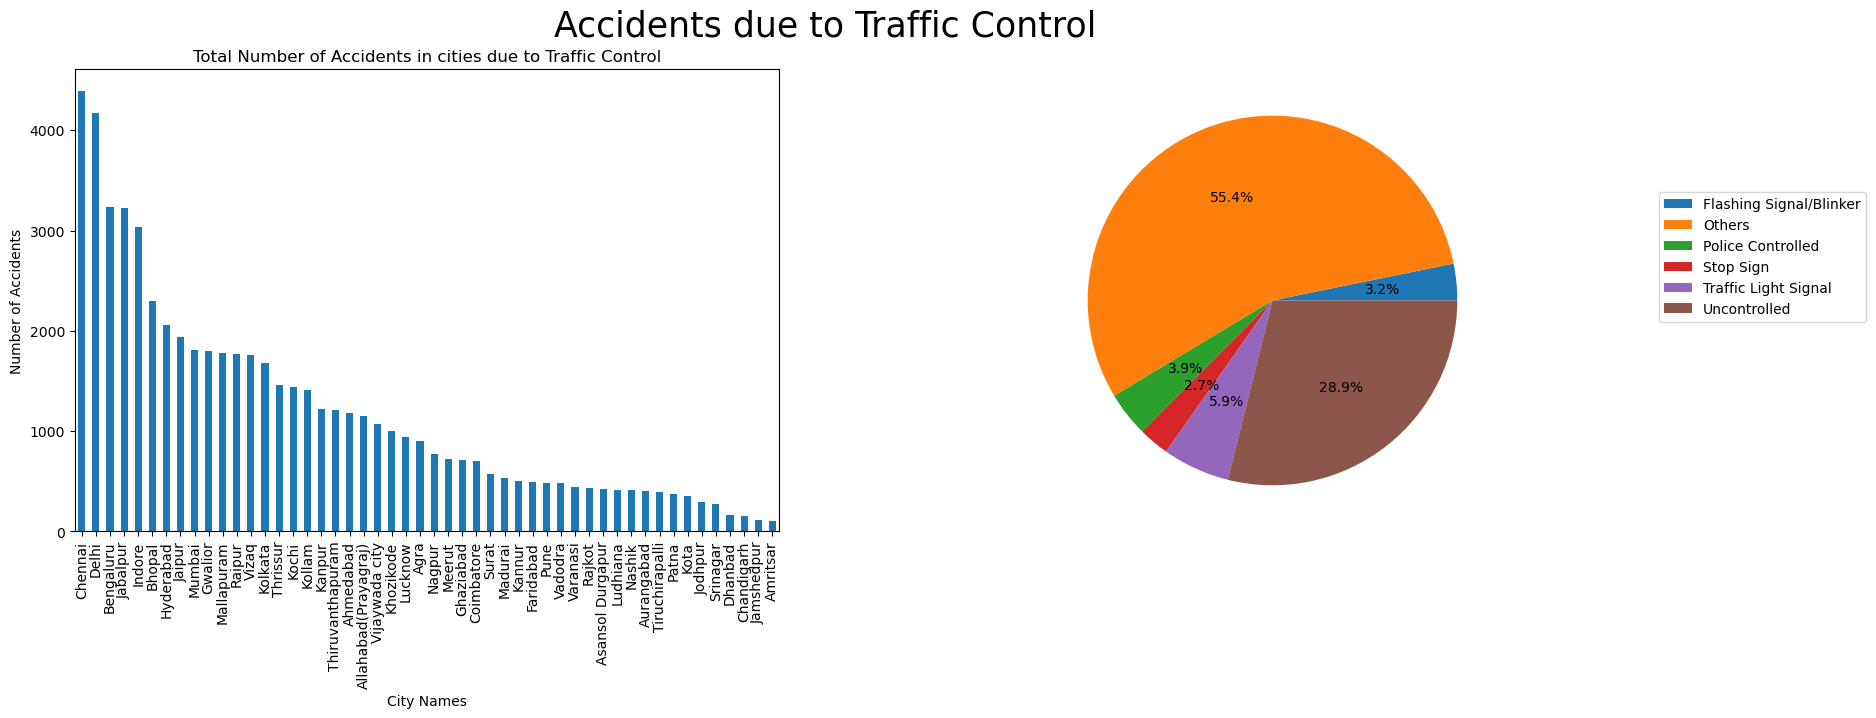

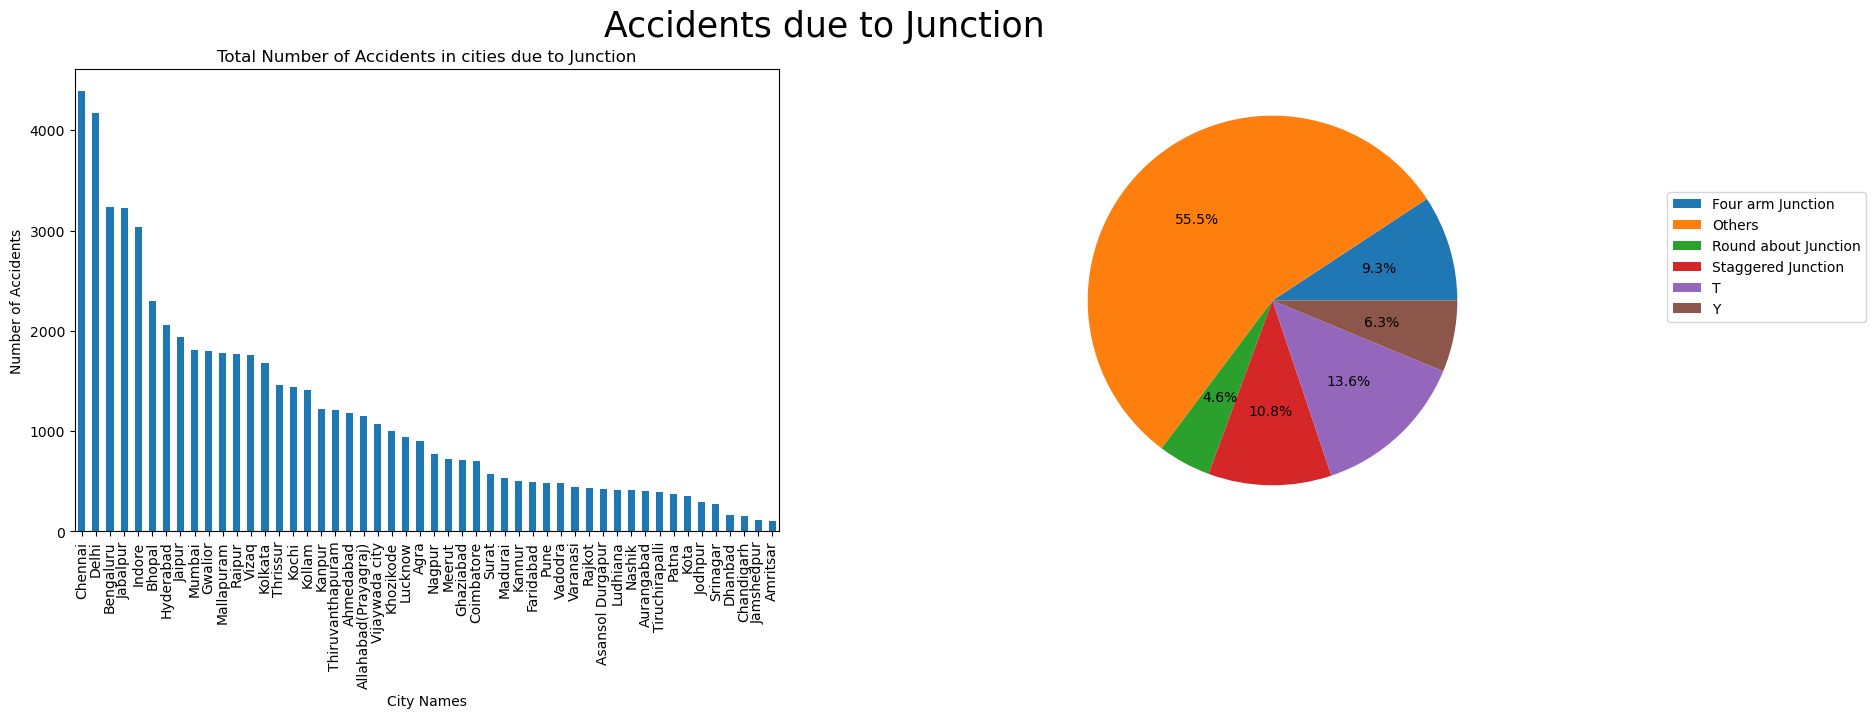

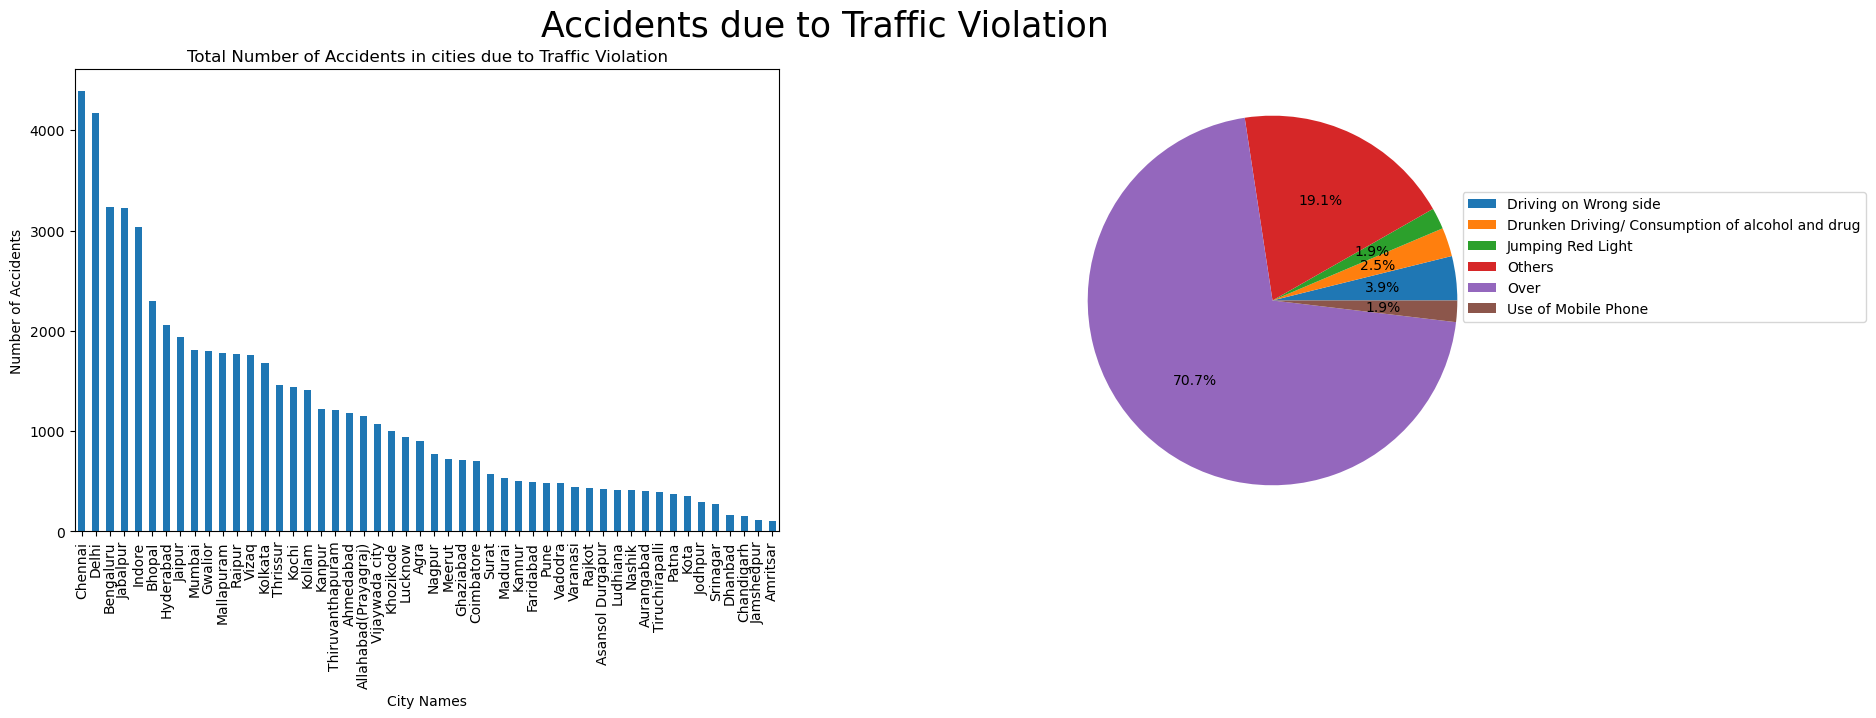

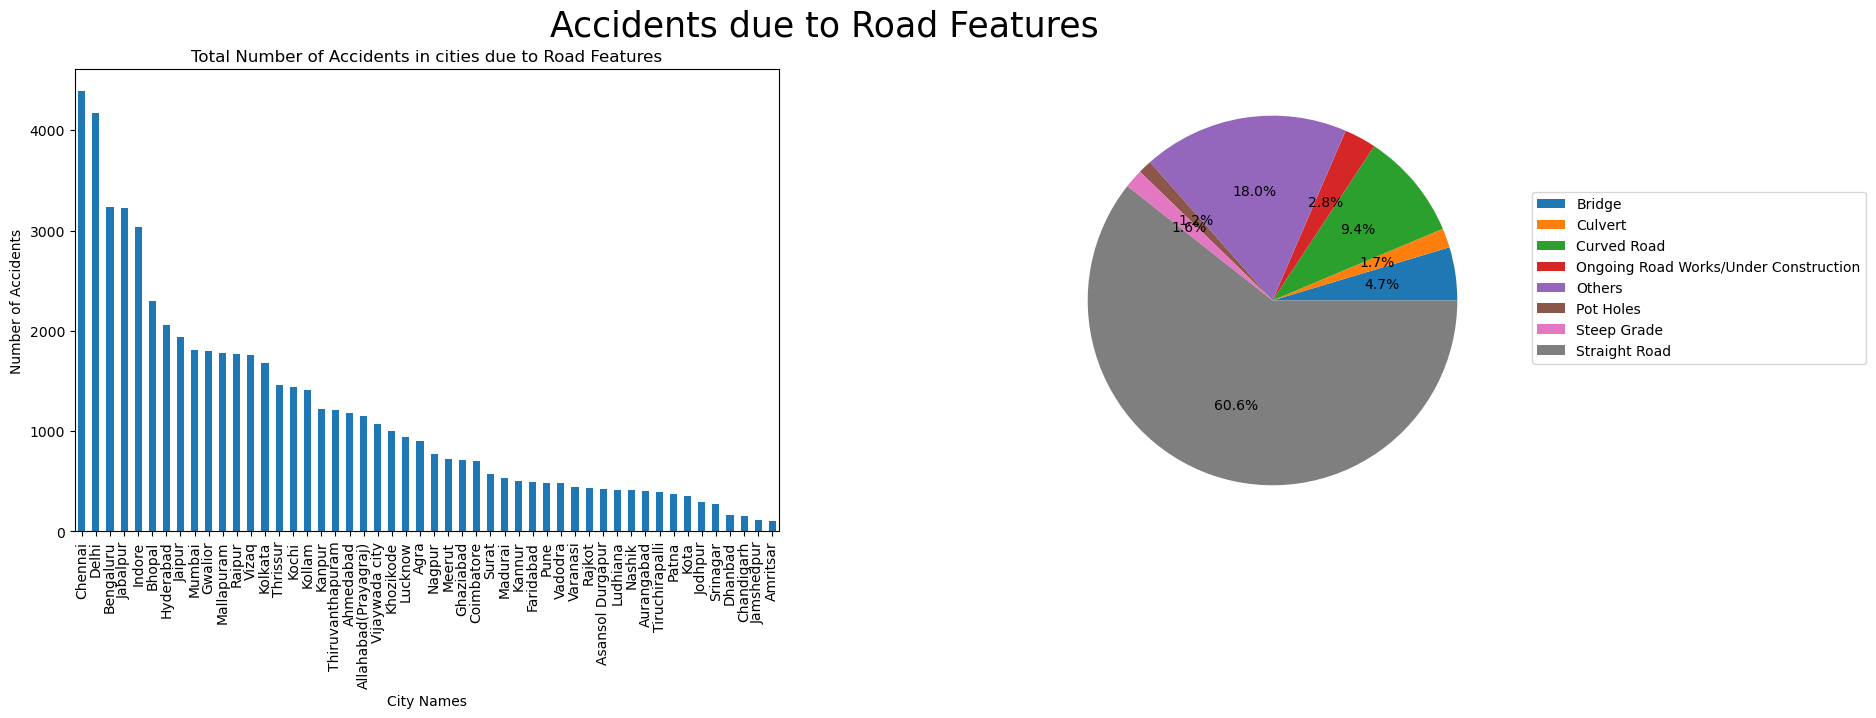

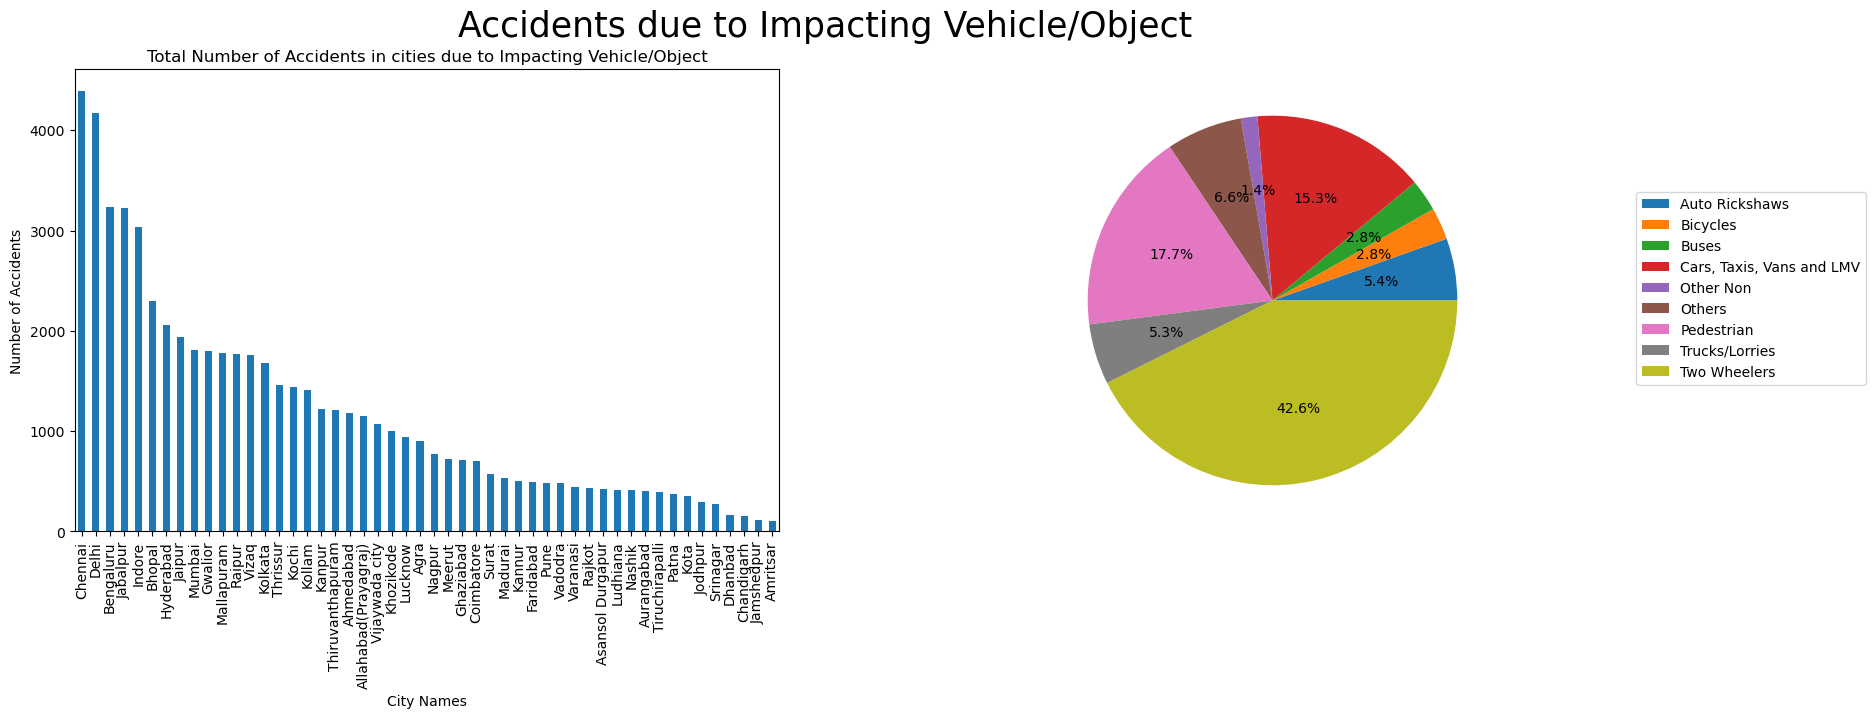

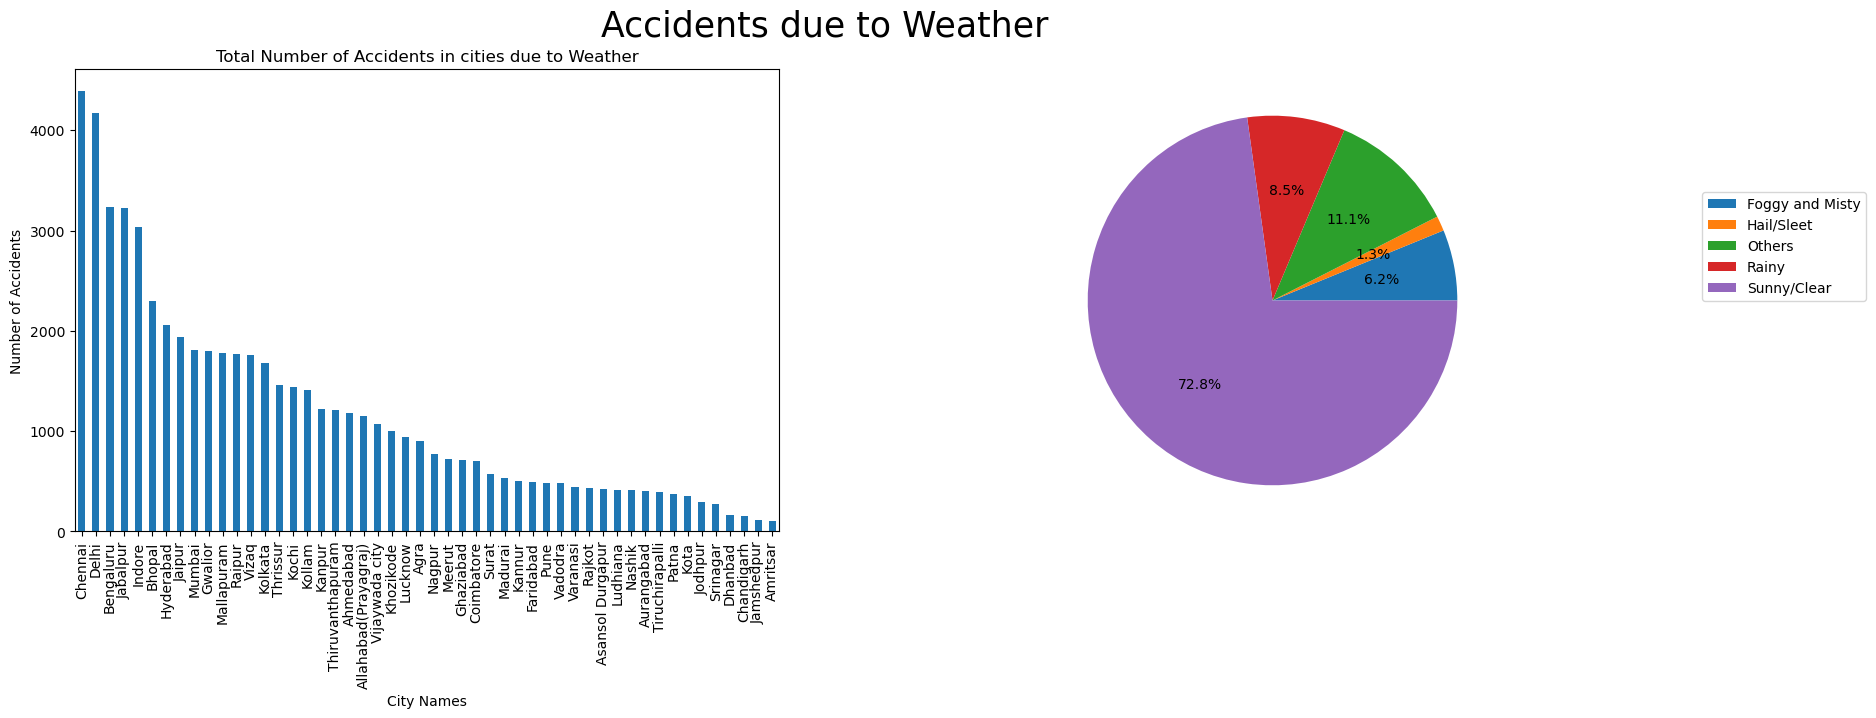

In [21]:
accidents_cat_labels = total_accidents_mask['Cause category'].unique()

plt.figure(figsize=(50, 20))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)

for label in accidents_cat_labels:
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    plt.suptitle("Accidents due to "+label, fontsize=25, horizontalalignment="center")
    
    label_mask = total_accidents_mask[total_accidents_mask['Cause category']==label]
    
    cat_accidents = label_mask.groupby(['Million Plus Cities']).agg('sum')[['Count']].sort_values(by='Count', ascending=False)   
    cat_accidents.plot(kind='bar', legend=False, title="Total Number of Accidents in cities due to "+label, ax=axes[0], xlabel="City Names", ylabel="Number of Accidents")

    plt.tick_params(pad=5, labelsize=6)
    
    subcat_labels_grp = label_mask.groupby(['Cause Subcategory']).agg('sum')[['Count']]
    subcat_labels_grp.plot(kind='pie', subplots=True, ylabel='', labeldistance=None, ax=axes[1], autopct='%1.1f%%')

    plt.legend(bbox_to_anchor=(1.8, .75), loc="upper right")
    
    plt.show()

In [22]:
accidents_cause_city_df = pd.DataFrame(columns = ['cause_sub_category', 'top_cities'])

for label in accidents_subcat_labels:
    label_mask = total_accidents_mask[total_accidents_mask['Cause Subcategory']==label]
    
    subcat_label_mask = total_accidents_mask[total_accidents_mask['Cause Subcategory']==label]
    subcat_accidents = subcat_label_mask.groupby(['Million Plus Cities']).agg('sum')[['Count']].sort_values(by='Count', ascending=False)

    top_3_cities = subcat_accidents.head(3).reset_index()[['Million Plus Cities']]
    accidents_cause_city_row = top_3_cities.apply(", ".join)

    data = pd.DataFrame({
            'cause_sub_category' : [label],
            'top_cities' : accidents_cause_city_row['Million Plus Cities']
    })
    accidents_cause_city_df = pd.concat([accidents_cause_city_df, data])

accidents_cause_city_df

cause_sub_category  \
0                           Flashing Signal/Blinker   
0                                            Others   
0                                 Police Controlled   
0                                         Stop Sign   
0                              Traffic Light Signal   
0                                      Uncontrolled   
0                                 Four arm Junction   
0                              Round about Junction   
0                                Staggered Junction   
0                                                 T   
0                                                 Y   
0                             Driving on Wrong side   
0  Drunken Driving/ Consumption of alcohol and drug   
0                                 Jumping Red Light   
0                                              Over   
0                               Use of Mobile Phone   
0                                            Bridge   
0                                           Culvert   
0                                       Curved Road   
0             Ongoing Road Works/Under Construction   
0                                         Pot Holes   
0                                       Steep Grade   
0                                     Straight Road   
0                                    Auto Rickshaws   
0                                          Bicycles   
0                                             Buses   
0                         Cars, Taxis, Vans and LMV   
0                                         Other Non   
0                                        Pedestrian   
0                                    Trucks/Lorries   
0                                      Two Wheelers   
0                                   Foggy and Misty   
0                                        Hail/Sleet   
0                                             Rainy   
0                                       Sunny/Clear   

                                top_cities  
0     Chennai, Delhi, Allahabad(Prayagraj)  
0                 Delhi, Jabalpur, Chennai  
0                Chennai, Kochi, Bengaluru  
0                   Bhopal, Chennai, Delhi  
0                Chennai, Delhi, Bengaluru  
0              Mumbai, Hyderabad, Jabalpur  
0               Indore, Chennai, Bengaluru  
0               Chennai, Hyderabad, Indore  
0               Mumbai, Hyderabad, Chennai  
0                  Jabalpur, Indore, Delhi  
0                Chennai, Indore, Jabalpur  
0     Delhi, Chennai, Allahabad(Prayagraj)  
0  Chennai, Allahabad(Prayagraj), Jabalpur  
0     Chennai, Delhi, Allahabad(Prayagraj)  
0               Indore, Bengaluru, Chennai  
0    Chennai, Kanpur, Allahabad(Prayagraj)  
0     Chennai, Delhi, Allahabad(Prayagraj)  
0    Chennai, Indore, Allahabad(Prayagraj)  
0                  Chennai, Delhi, Gwalior  
0    Kanpur, Chennai, Allahabad(Prayagraj)  
0   Allahabad(Prayagraj), Chennai, Lucknow  
0    Chennai, Indore, Allahabad(Prayagraj)  
0                 Bengaluru, Delhi, Indore  
0            Chennai, Jabalpur, Mallapuram  
0                 Chennai, Delhi, Ludhiana  
0   Chennai, Gwalior, Allahabad(Prayagraj)  
0            Mallapuram, Jabalpur, Chennai  
0                    Kanpur, Chennai, Agra  
0                    Delhi, Mumbai, Indore  
0                 Kanpur, Jabalpur, Jaipur  
0               Jabalpur, Bengaluru, Delhi  
0                 Chennai, Kanpur, Lucknow  
0    Allahabad(Prayagraj), Rajkot, Lucknow  
0                   Chennai, Raipur, Delhi  
0                 Bengaluru, Indore, Delhi

<Figure size 3000x1200 with 0 Axes>

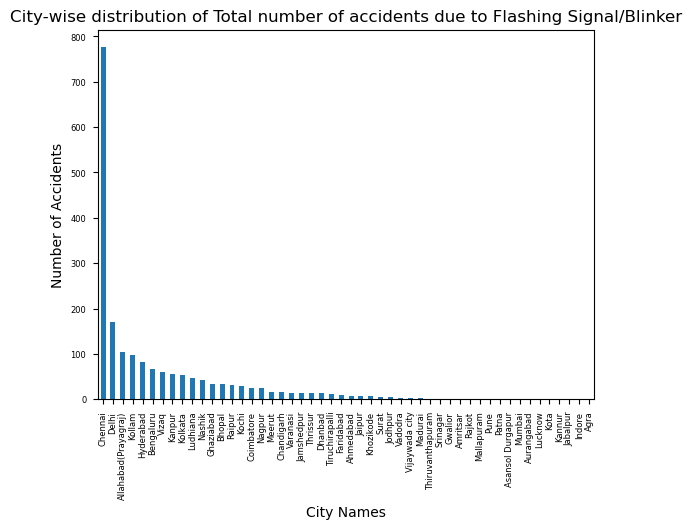

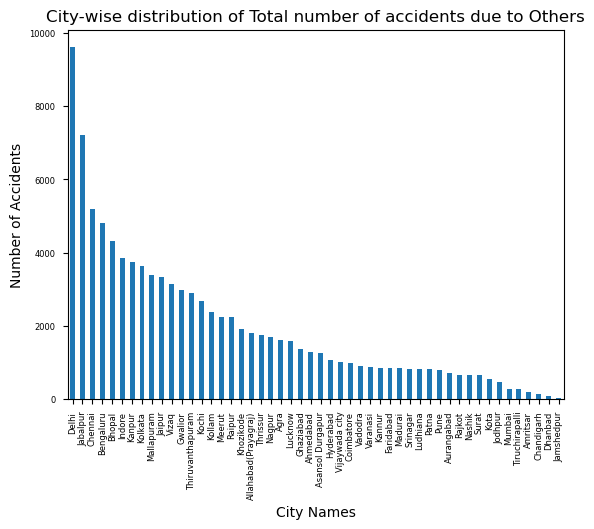

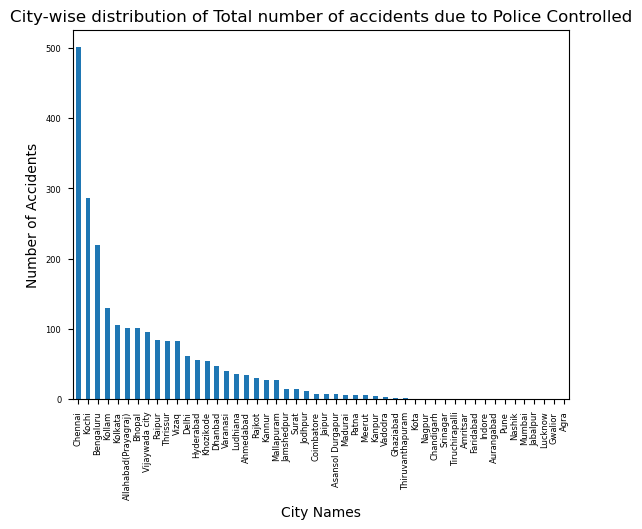

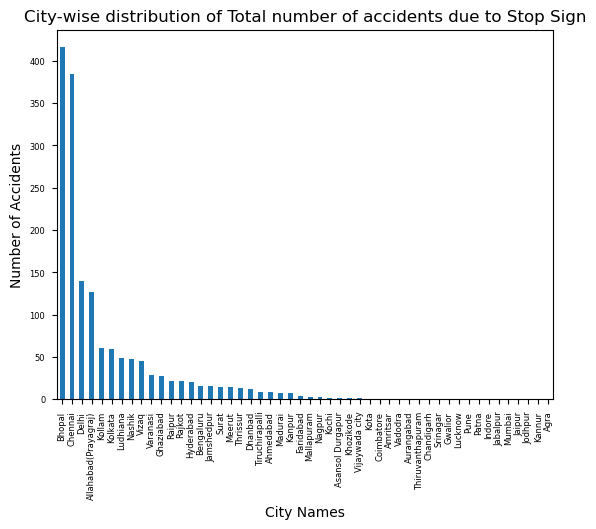

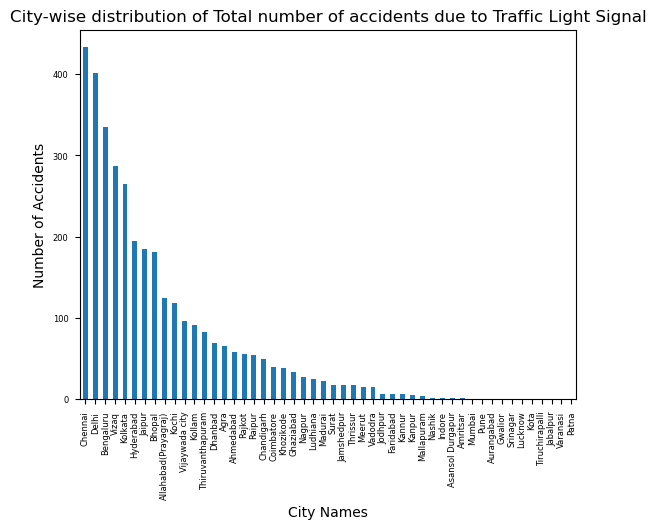

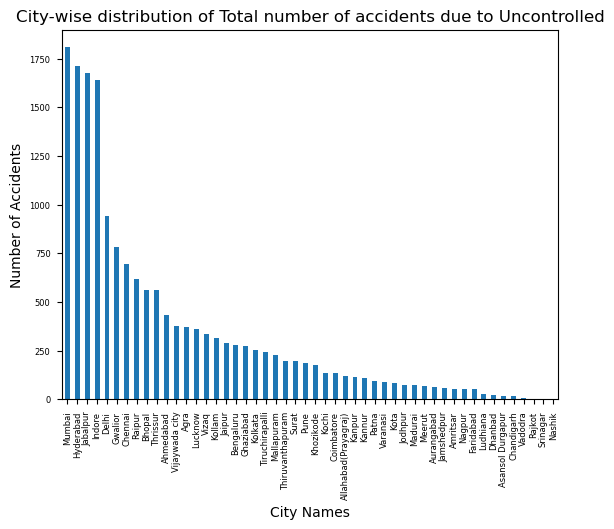

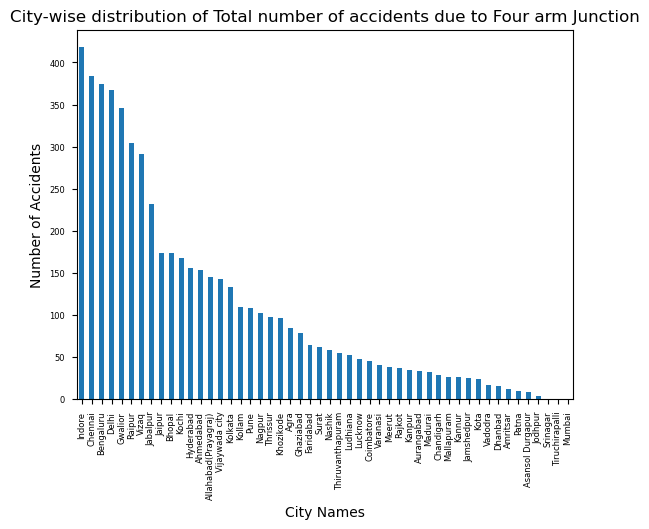

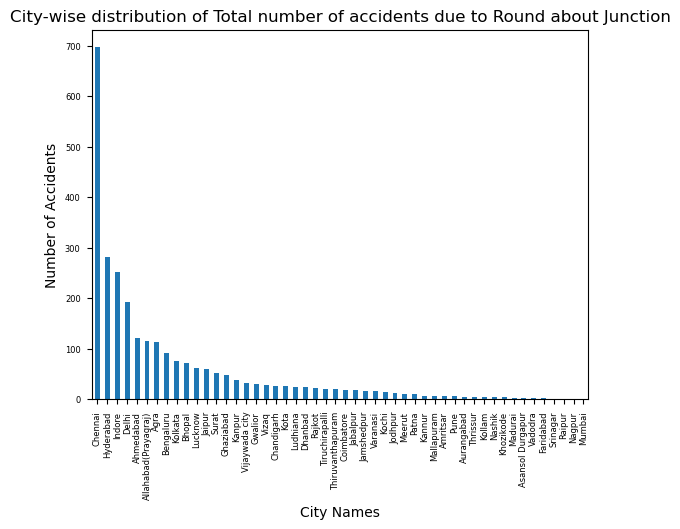

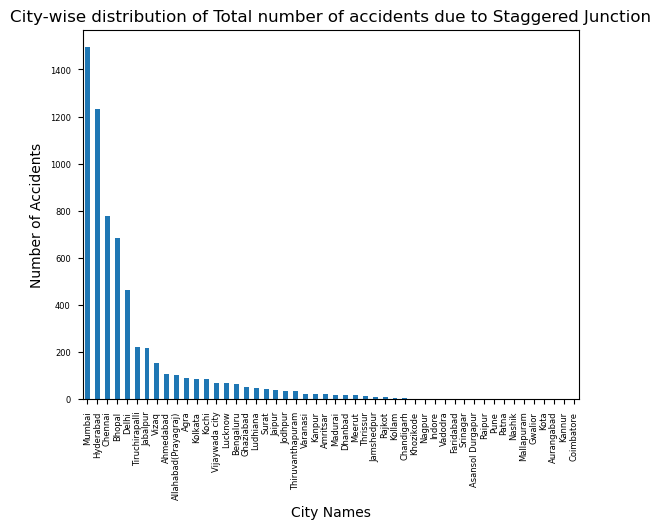

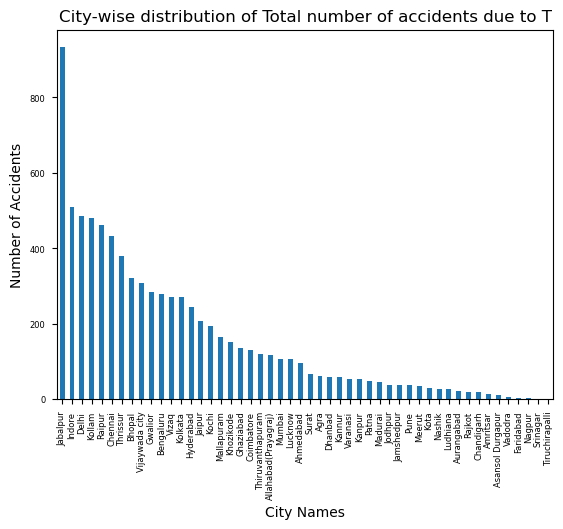

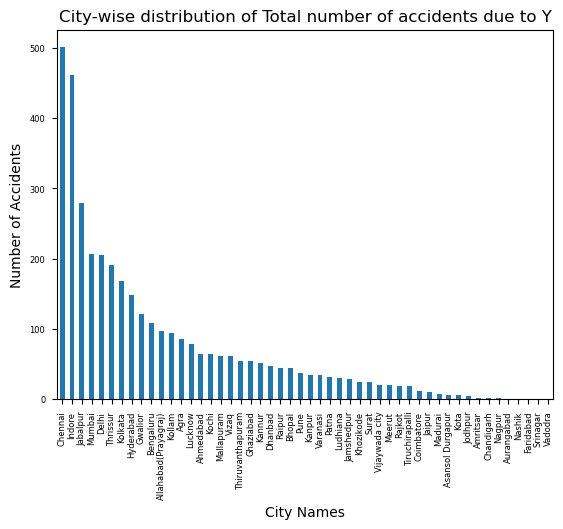

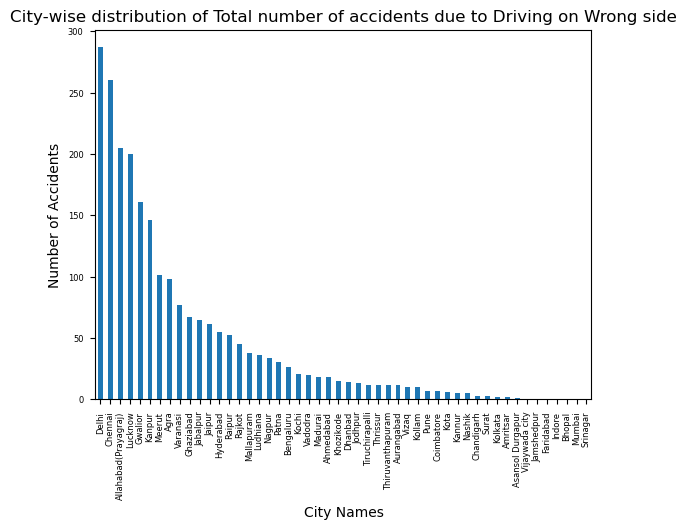

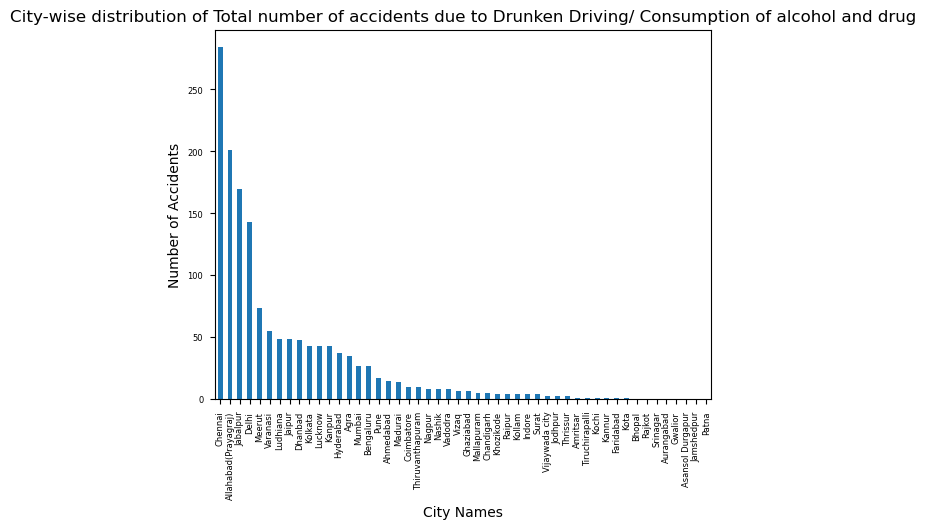

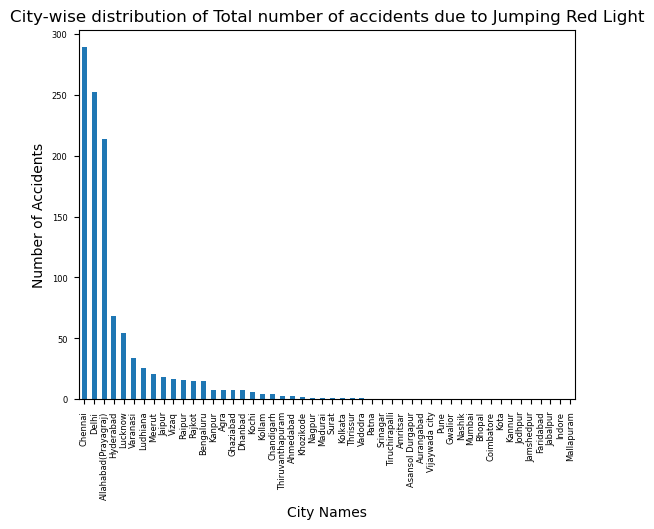

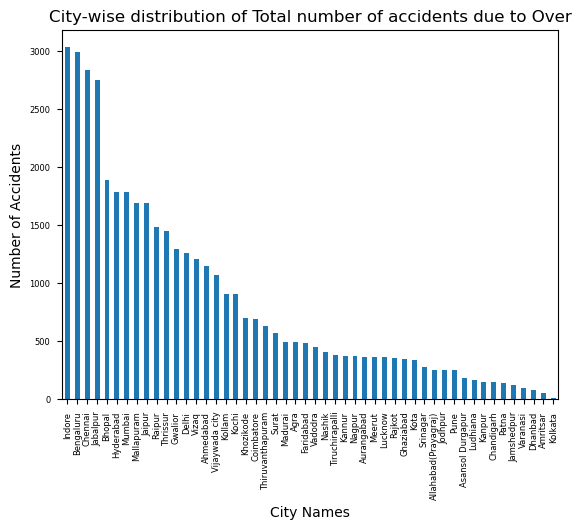

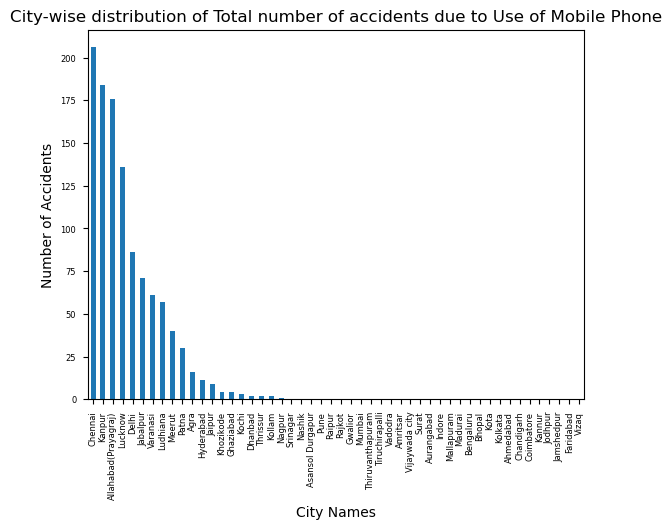

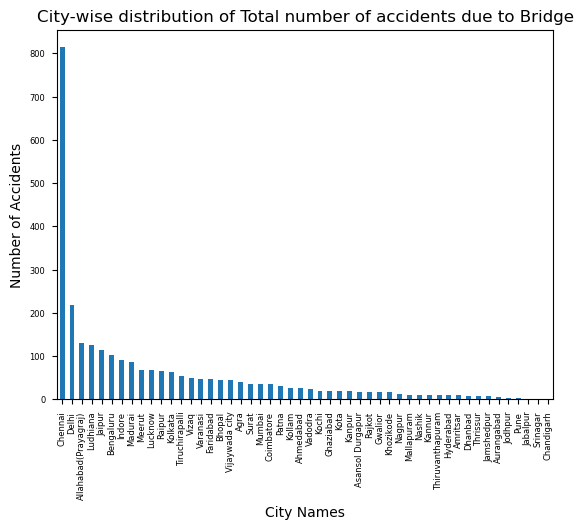

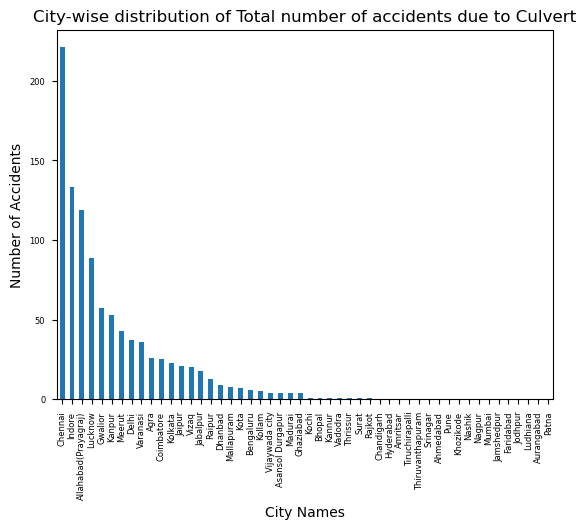

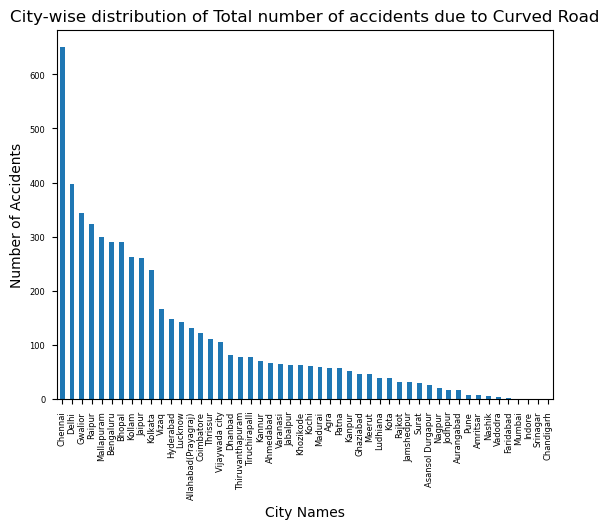

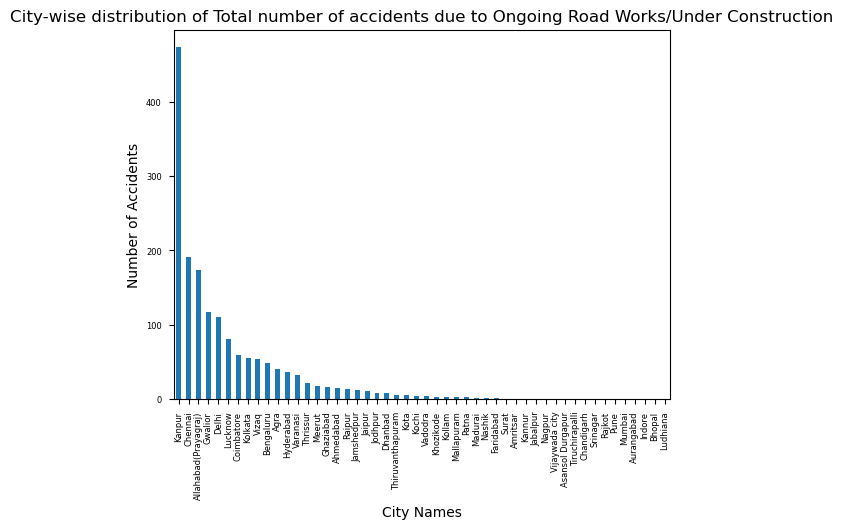

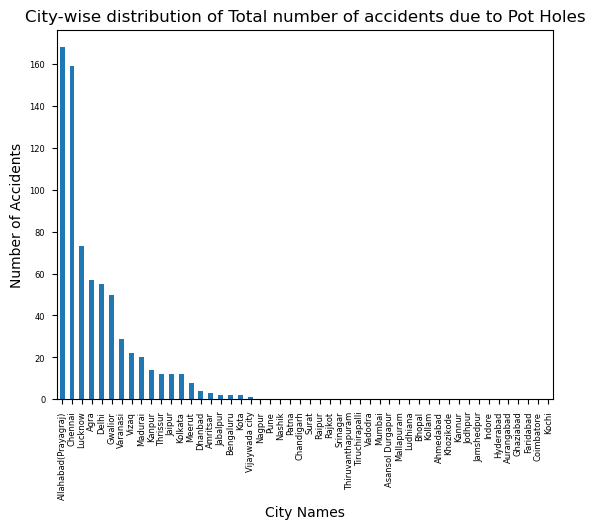

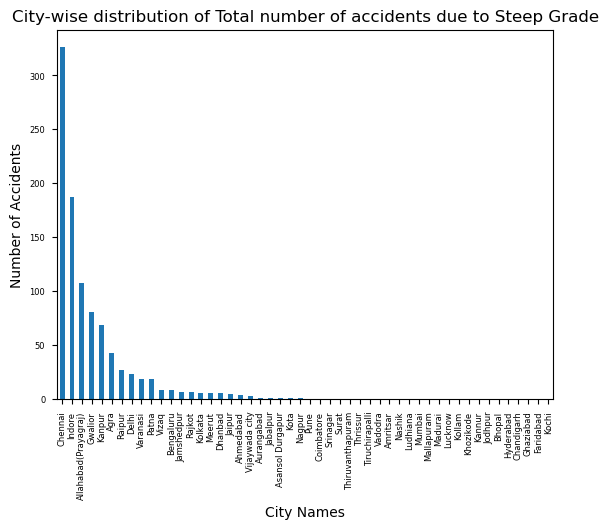

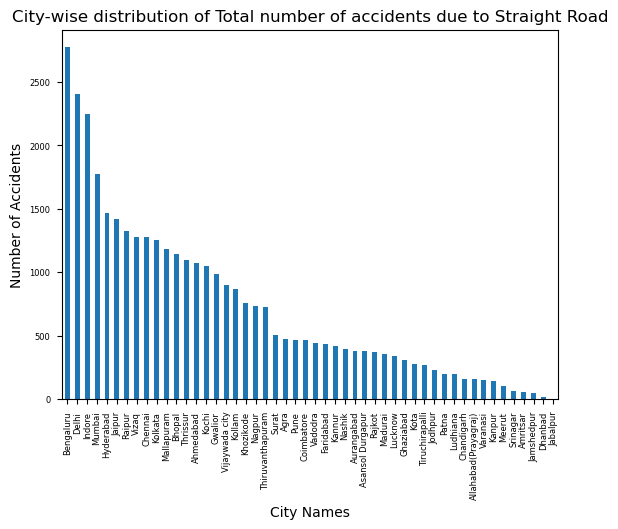

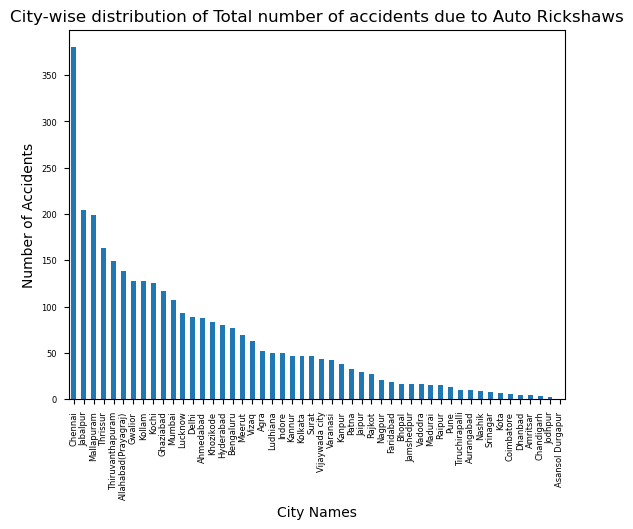

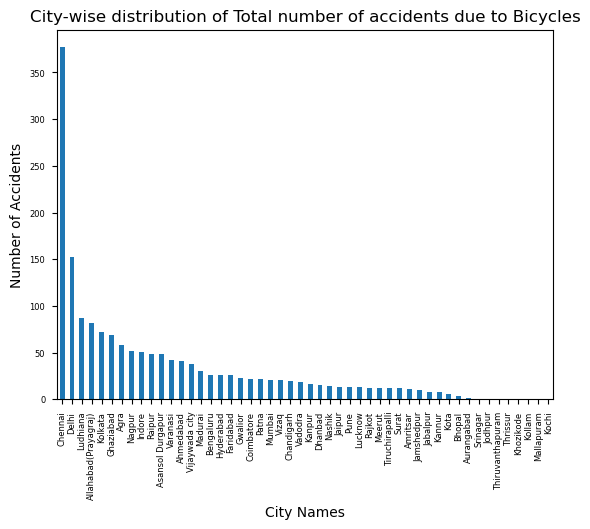

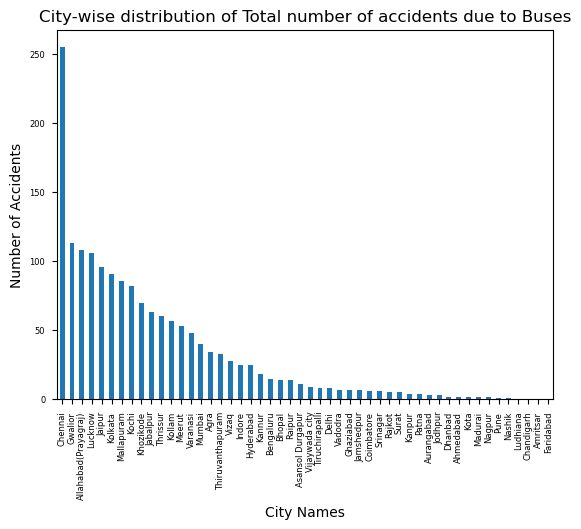

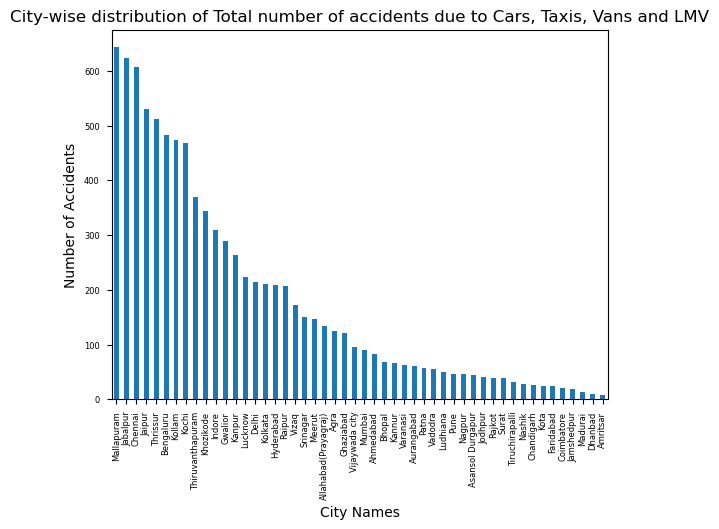

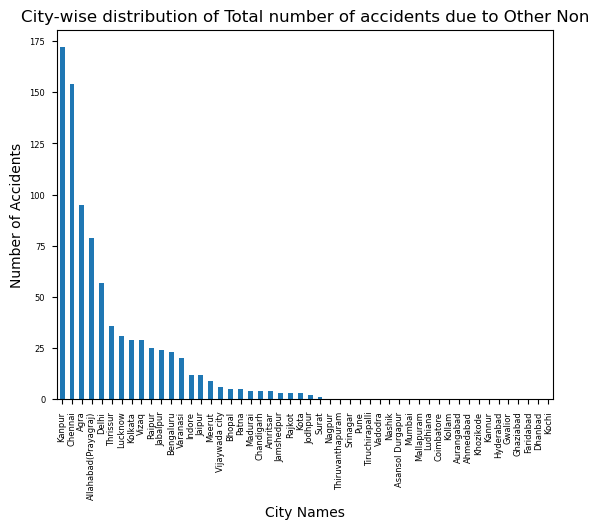

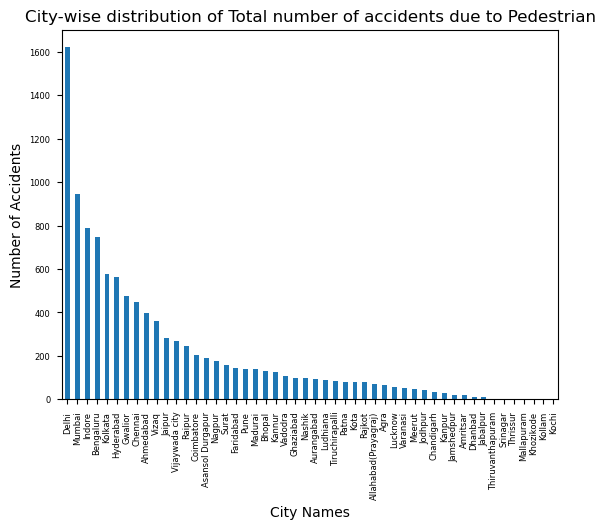

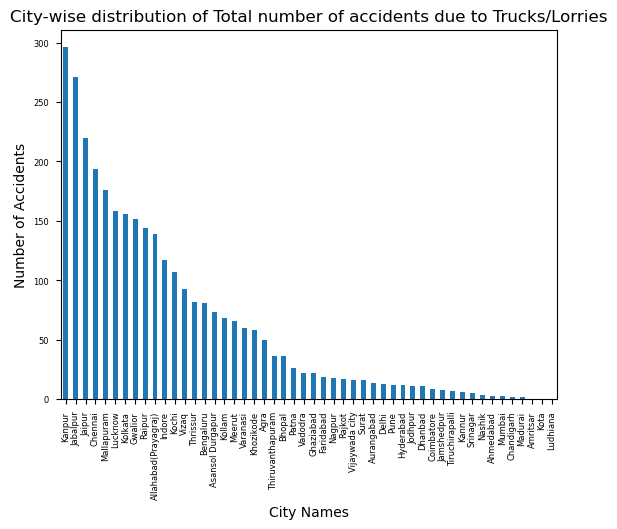

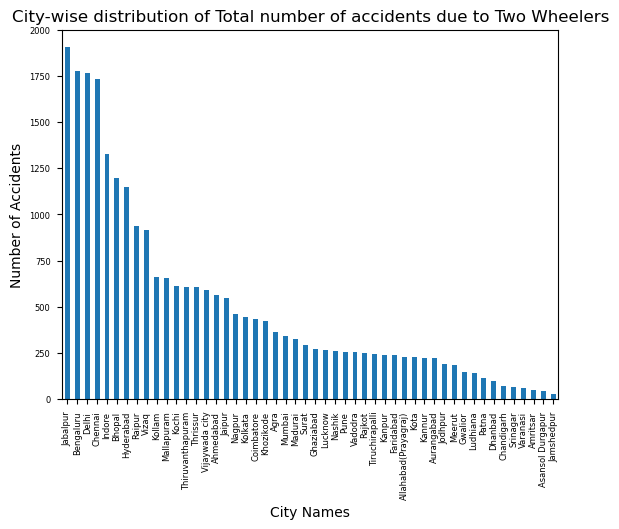

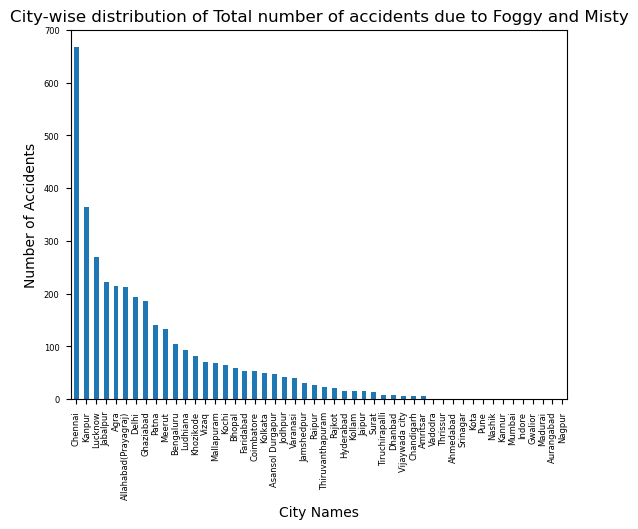

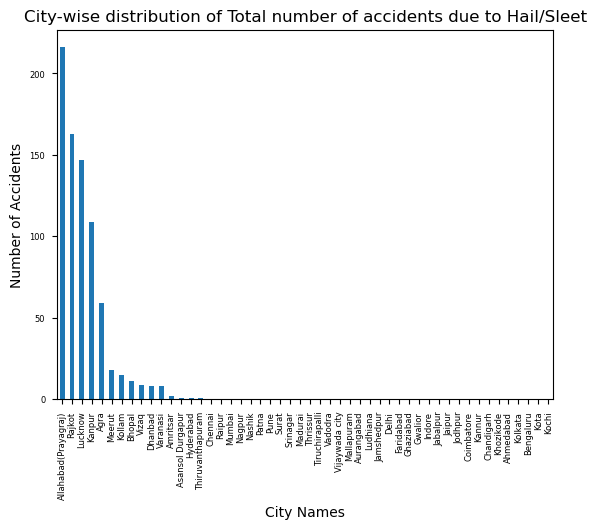

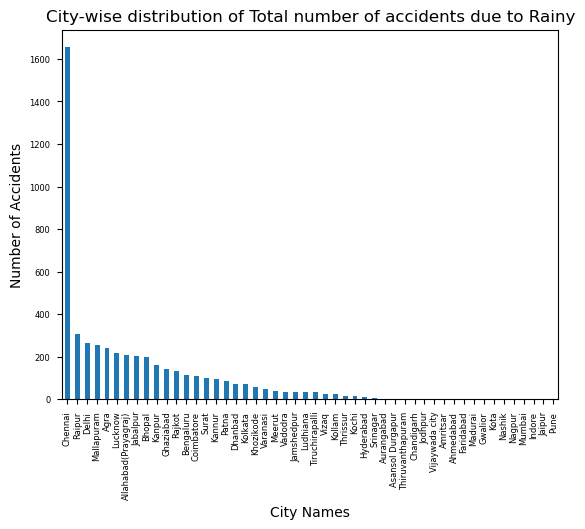

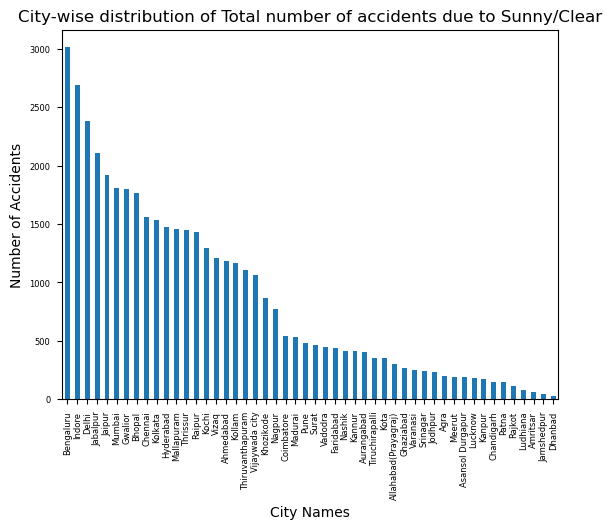

In [23]:
plt.figure(figsize=(30, 12))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)

for label in accidents_subcat_labels:

    label_mask = total_accidents_mask[total_accidents_mask['Cause Subcategory']==label]
    
    subcat_label_mask = total_accidents_mask[total_accidents_mask['Cause Subcategory']==label]
    subcat_accidents = subcat_label_mask.groupby(['Million Plus Cities']).agg('sum')[['Count']].sort_values(by='Count', ascending=False)
    subcat_accidents.plot(kind='bar', title="City-wise distribution of Total number of accidents due to "+ label, xlabel="City Names", ylabel="Number of Accidents", legend=False)

    plt.tick_params(pad=5, labelsize=6)
    plt.show()

In [24]:
total_injured_mask = df[df['Outcome of Incident']=="Total Injured"]

<Figure size 5000x1500 with 0 Axes>

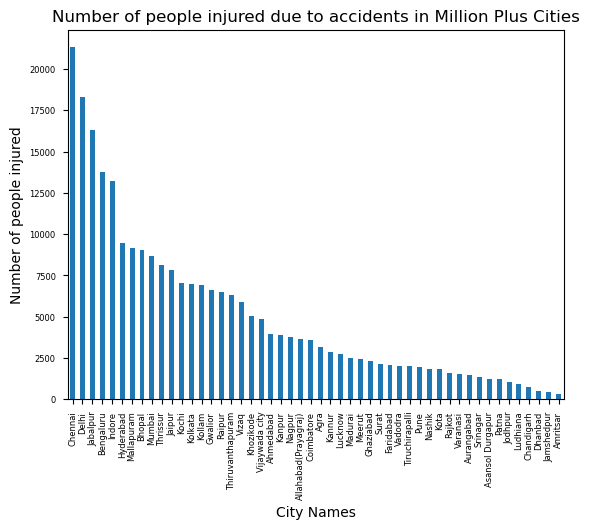

In [25]:
plt.figure(figsize=(50, 15))

cat_grp_injured = total_injured_mask.groupby(['Million Plus Cities']).agg('sum')[['Count']]\
    .sort_values(by='Count', ascending=False)

cat_grp_injured.plot(kind="bar", title="Number of people injured due to accidents in Million Plus Cities", legend=False, xlabel="City Names", ylabel="Number of people injured")

plt.tick_params(pad=5, labelsize=6)
plt.show()

In [26]:
cat_grp_injured['percent'] = cat_grp_injured.transform(lambda x: (x/x.sum()) * 100)
cat_grp_injured

Count   percent
Million Plus Cities                    
Chennai               21315.0  8.439078
Delhi                 18310.0  7.249332
Jabalpur              16285.0  6.447590
Bengaluru             13755.0  5.445907
Indore                13240.0  5.242007
Hyderabad              9460.0  3.745422
Mallapuram             9140.0  3.618727
Bhopal                 9035.0  3.577155
Mumbai                 8700.0  3.444521
Thrissur               8160.0  3.230724
Jaipur                 7840.0  3.104029
Kochi                  7030.0  2.783332
Kolkata                7005.0  2.773434
Kollam                 6905.0  2.733841
Gwalior                6645.0  2.630902
Raipur                 6470.0  2.561615
Thiruvanthapuram       6315.0  2.500247
Vizaq                  5910.0  2.339899
Khozikode              5060.0  2.003365
Vijaywada city         4885.0  1.934079
Ahmedabad              3930.0  1.555973
Kanpur                 3890.0  1.540137
Nagpur                 3760.0  1.488667
Allahabad(Prayagraj)   3660.0  1.449075
Coimbatore             3610.0  1.429278
Agra                   3165.0  1.253093
Kannur                 2865.0  1.134317
Lucknow                2770.0  1.096704
Madurai                2495.0  0.987825
Meerut                 2435.0  0.964070
Ghaziabad              2325.0  0.920519
Surat                  2115.0  0.837375
Faridabad              2105.0  0.833416
Vadodra                2040.0  0.807681
Tiruchirapalli         2005.0  0.793824
Pune                   1940.0  0.768089
Nashik                 1825.0  0.722558
Kota                   1810.0  0.716619
Rajkot                 1620.0  0.641394
Varanasi               1525.0  0.603781
Aurangabad             1465.0  0.580026
Srinagar               1375.0  0.544393
Asansol Durgapur       1230.0  0.486984
Patna                  1215.0  0.481045
Jodhpur                1035.0  0.409779
Ludhiana                920.0  0.364248
Chandigarh              740.0  0.292982
Dhanbad                 490.0  0.194002
Jamshedpur              455.0  0.180145
Amritsar                295.0  0.116797

In [27]:
injured_subcat_labels = total_injured_mask['Cause Subcategory'].unique()

<Figure size 5000x2000 with 0 Axes>

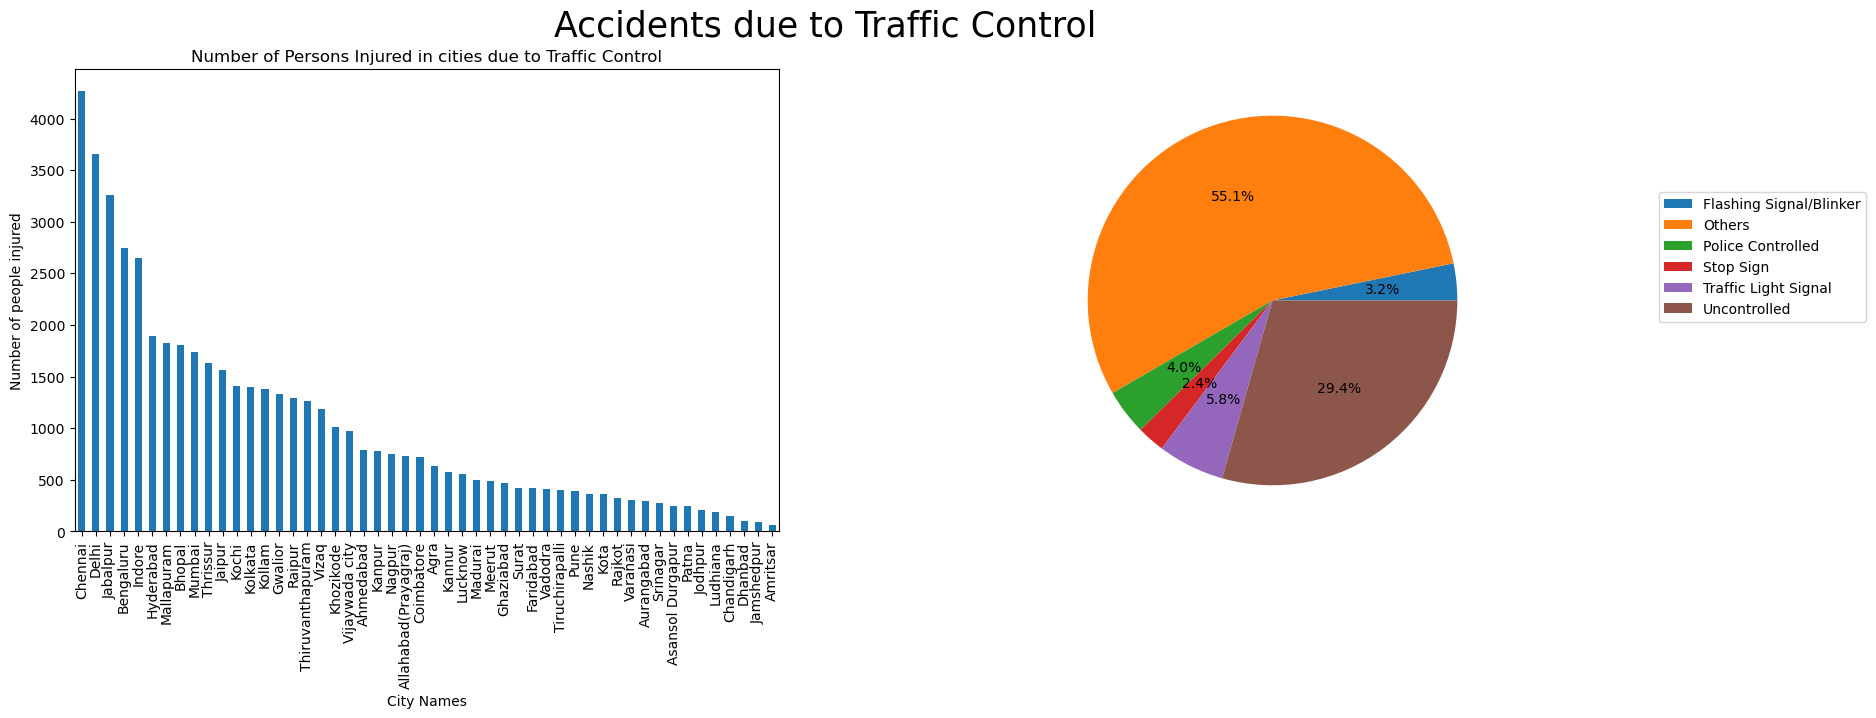

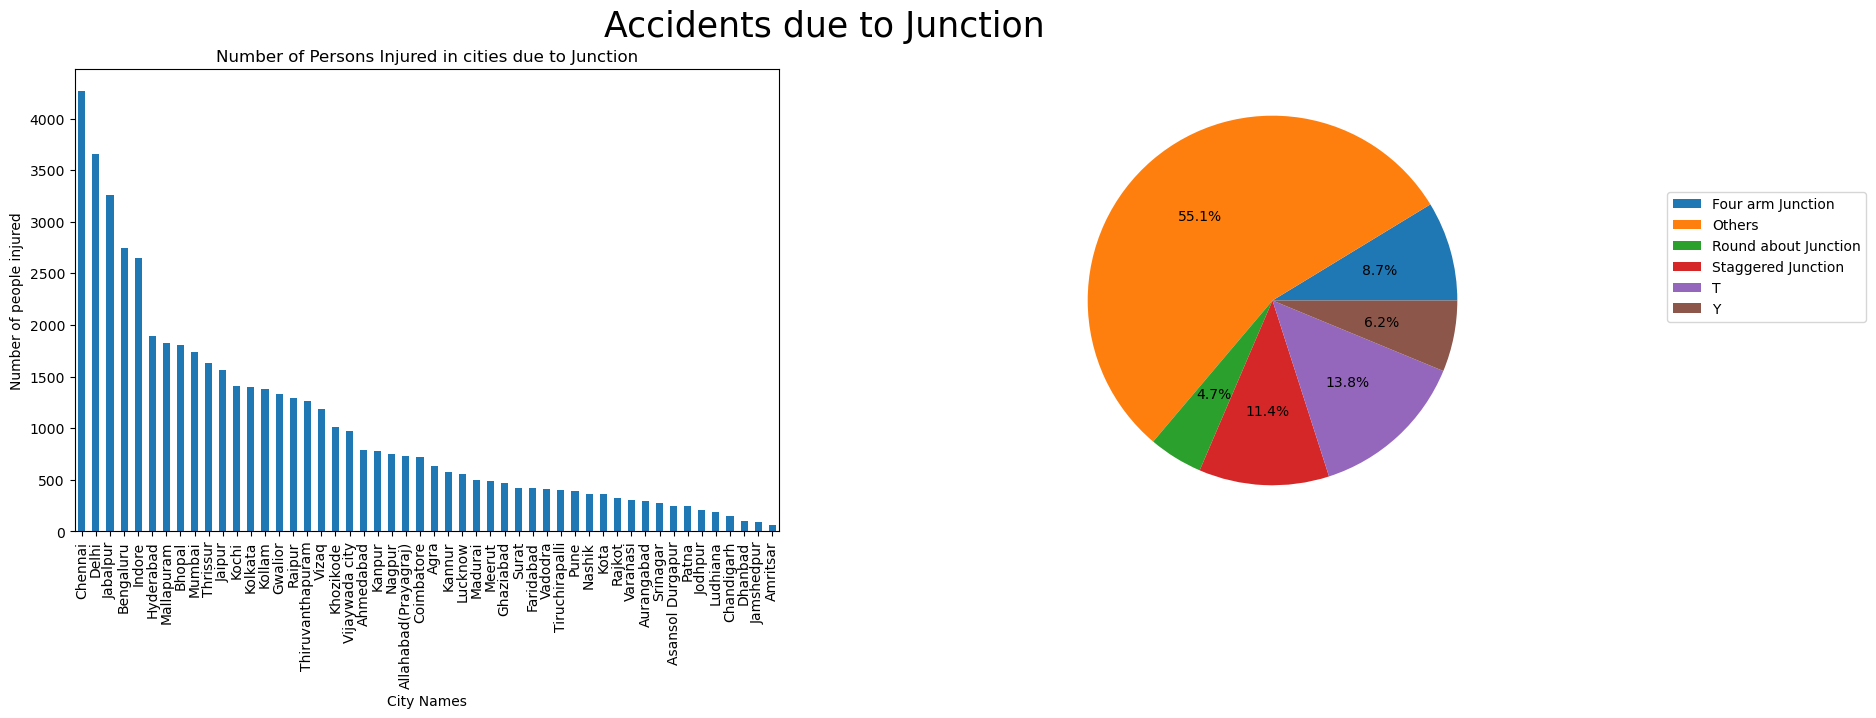

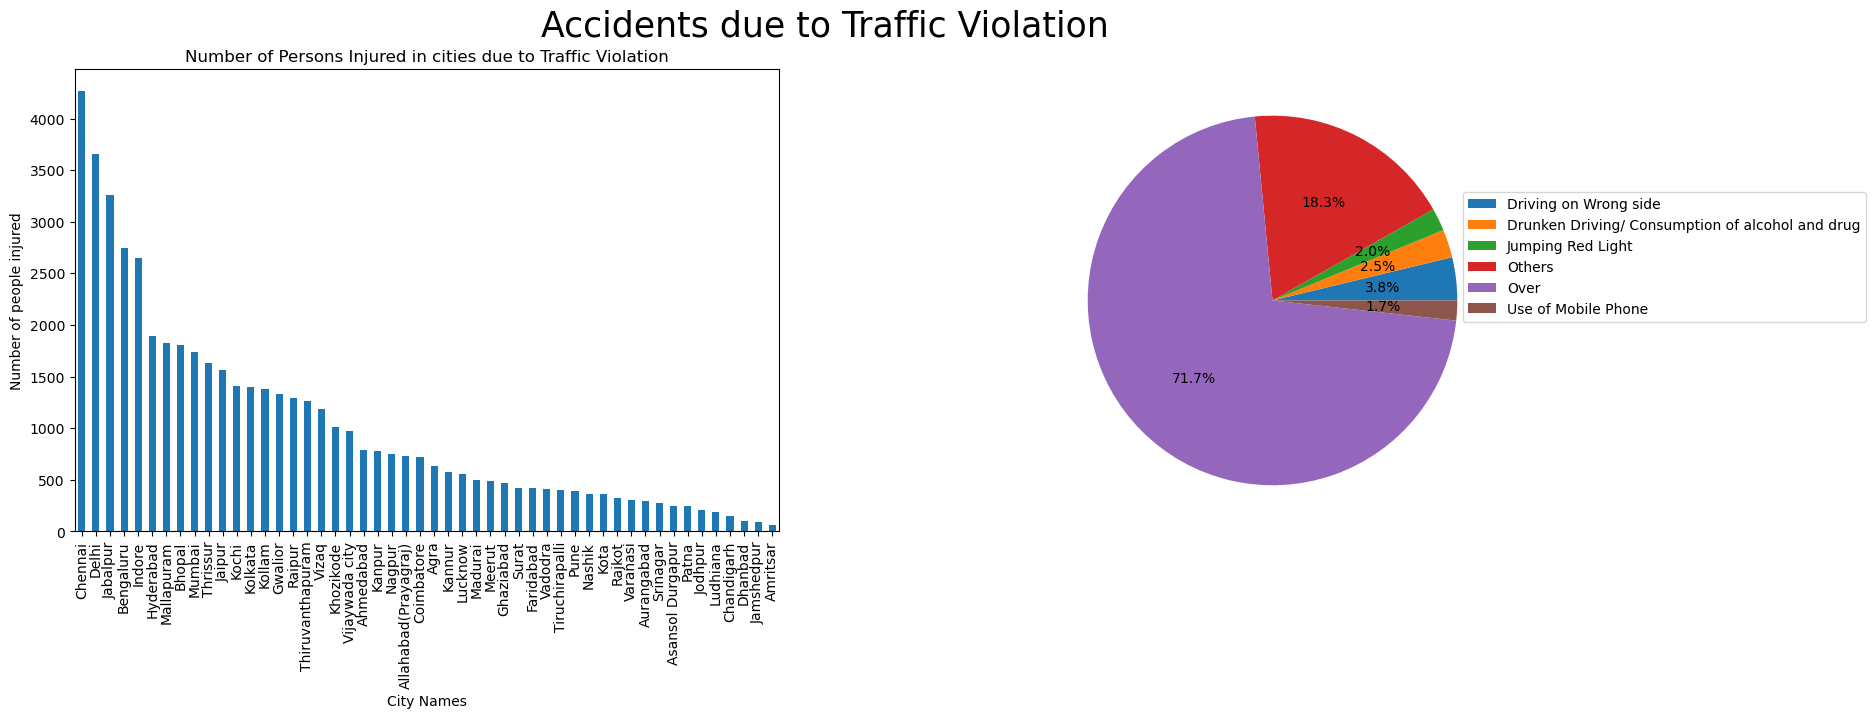

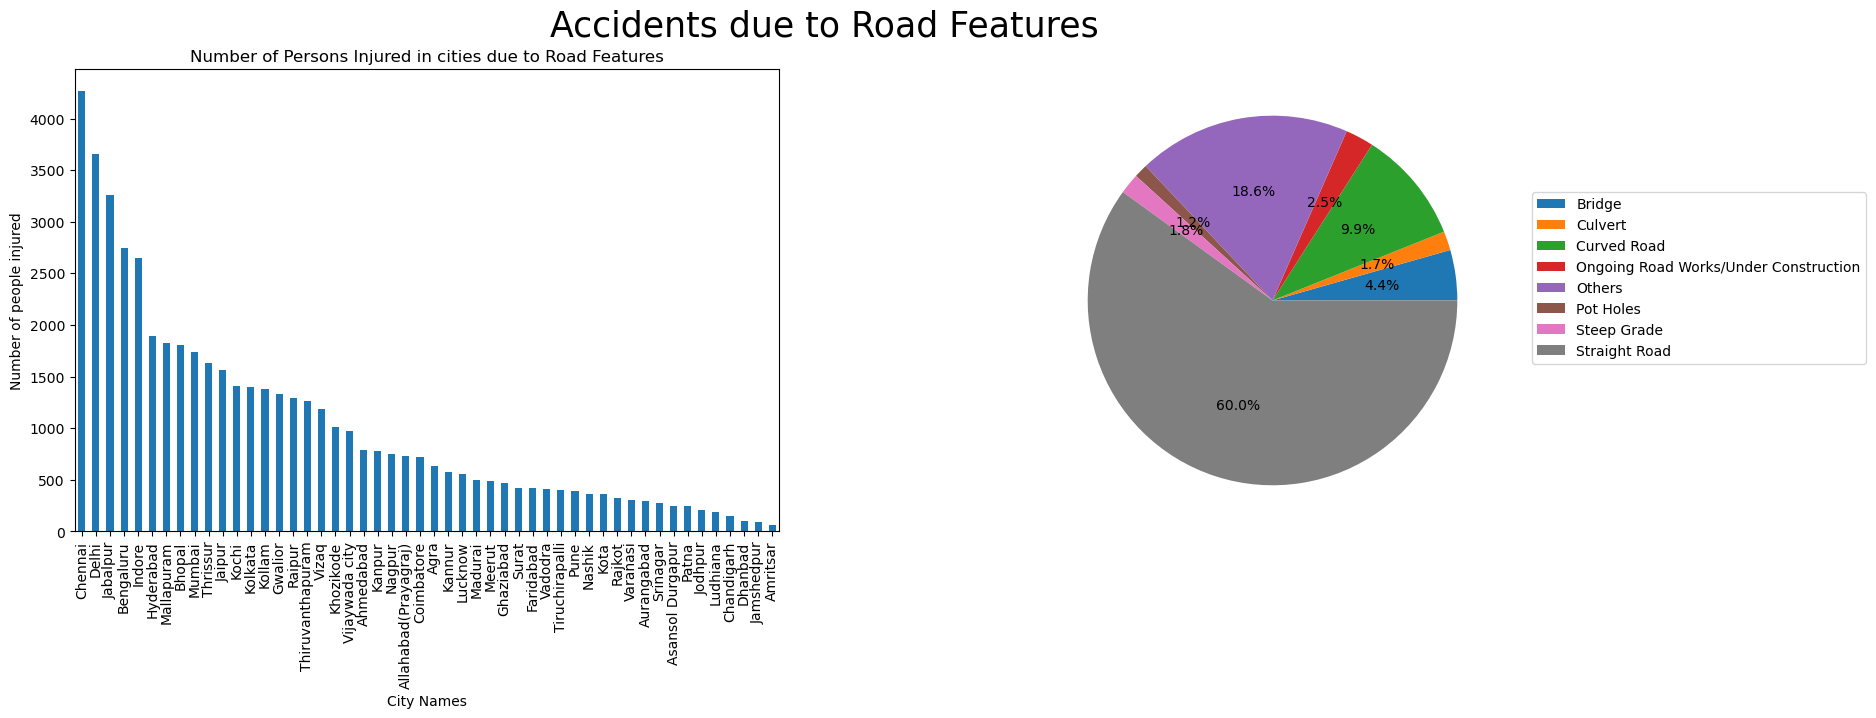

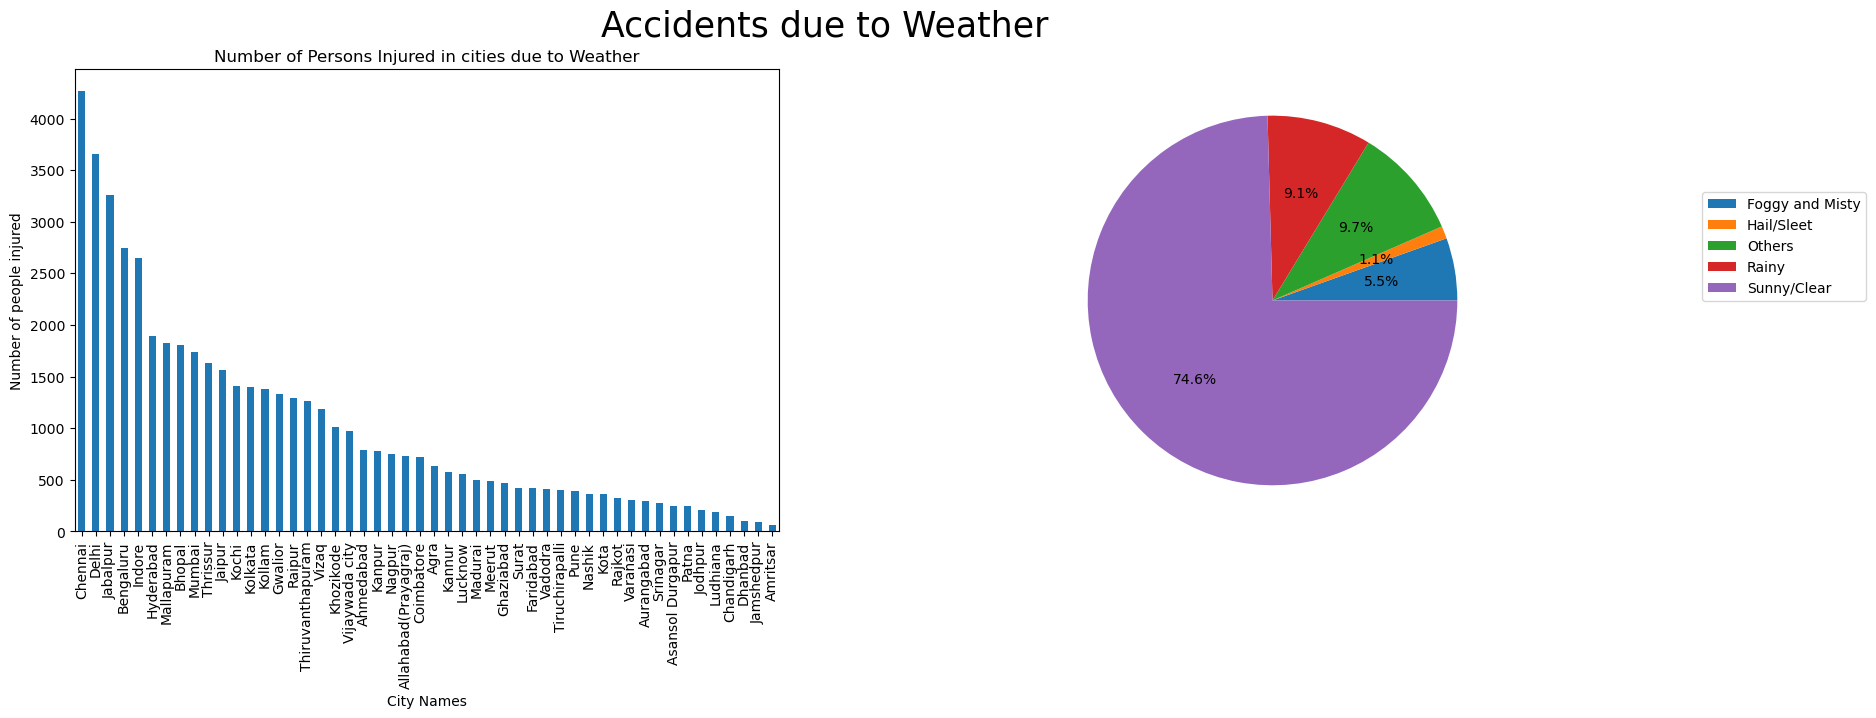

In [28]:
injured_cat_labels = total_injured_mask['Cause category'].unique()

plt.figure(figsize=(50, 20))
plt.subplots_adjust(hspace=0.5, wspace = 0.3)

for label in injured_cat_labels:
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))
    plt.suptitle("Accidents due to "+label, fontsize=25, horizontalalignment='center')
    label_mask = total_injured_mask[total_injured_mask['Cause category']==label]
    cat_injured = label_mask.groupby(['Million Plus Cities']).agg('sum')[['Count']].sort_values(by='Count', ascending=False)   
    cat_injured.plot(kind='bar', title="Number of Persons Injured in cities due to "+label, ax=axes[0], legend=False, xlabel="City Names", ylabel="Number of people injured")
    plt.tick_params(pad=5, labelsize=6)
    subcat_labels_grp = label_mask.groupby(['Cause Subcategory']).agg('sum')[['Count']]
    subcat_labels_grp.plot(kind='pie', subplots=True, ylabel='', labeldistance=None, ax=axes[1], autopct='%1.1f%%')
    plt.legend(bbox_to_anchor=(1.8, .75), loc="upper right")
    
    plt.show()

In [29]:
injured_cause_city_df = pd.DataFrame(columns = ['cause_sub_category', 'top_cities'])

for label in injured_subcat_labels:
    label_mask = total_injured_mask[total_injured_mask['Cause Subcategory']==label]
    
    subcat_label_mask = total_injured_mask[total_injured_mask['Cause Subcategory']==label]
    subcat_injured = subcat_label_mask.groupby(['Million Plus Cities']).agg('sum')[['Count']].sort_values(by='Count', ascending=False)
    top_3_cities = subcat_injured.head(3).reset_index()[['Million Plus Cities']]
    injured_cause_city_row = top_3_cities.apply(", ".join)

    data = pd.DataFrame({
            'cause_sub_category' : [label],
            'top_cities' : injured_cause_city_row['Million Plus Cities']
    })
    injured_cause_city_df = pd.concat([injured_cause_city_df, data])

injured_cause_city_df

cause_sub_category  \
0                           Flashing Signal/Blinker   
0                                            Others   
0                                 Police Controlled   
0                                         Stop Sign   
0                              Traffic Light Signal   
0                                      Uncontrolled   
0                                 Four arm Junction   
0                              Round about Junction   
0                                Staggered Junction   
0                                                 T   
0                                                 Y   
0                             Driving on Wrong side   
0  Drunken Driving/ Consumption of alcohol and drug   
0                                 Jumping Red Light   
0                                              Over   
0                               Use of Mobile Phone   
0                                            Bridge   
0                                           Culvert   
0                                       Curved Road   
0             Ongoing Road Works/Under Construction   
0                                         Pot Holes   
0                                       Steep Grade   
0                                     Straight Road   
0                                   Foggy and Misty   
0                                        Hail/Sleet   
0                                             Rainy   
0                                       Sunny/Clear   

                              top_cities  
0                 Chennai, Delhi, Kollam  
0               Delhi, Jabalpur, Chennai  
0              Chennai, Kochi, Bengaluru  
0                 Bhopal, Chennai, Delhi  
0              Chennai, Delhi, Bengaluru  
0            Jabalpur, Mumbai, Hyderabad  
0             Indore, Bengaluru, Chennai  
0             Chennai, Indore, Hyderabad  
0             Mumbai, Hyderabad, Chennai  
0              Jabalpur, Kollam, Chennai  
0              Chennai, Indore, Jabalpur  
0   Chennai, Delhi, Allahabad(Prayagraj)  
0               Chennai, Jabalpur, Delhi  
0   Chennai, Delhi, Allahabad(Prayagraj)  
0            Jabalpur, Indore, Bengaluru  
0  Chennai, Kanpur, Allahabad(Prayagraj)  
0   Chennai, Delhi, Allahabad(Prayagraj)  
0  Chennai, Indore, Allahabad(Prayagraj)  
0             Chennai, Delhi, Mallapuram  
0  Kanpur, Chennai, Allahabad(Prayagraj)  
0   Chennai, Allahabad(Prayagraj), Delhi  
0  Chennai, Indore, Allahabad(Prayagraj)  
0               Bengaluru, Delhi, Indore  
0                 Chennai, Delhi, Kanpur  
0  Allahabad(Prayagraj), Rajkot, Lucknow  
0             Chennai, Delhi, Mallapuram  
0            Bengaluru, Indore, Jabalpur

In [30]:
df["Cause Subcategory"].value_counts()

Cause Subcategory
Others                                              1450
Flashing Signal/Blinker                              250
Over                                                 250
Rainy                                                250
Hail/Sleet                                           250
Foggy and Misty                                      250
Straight Road                                        250
Steep Grade                                          250
Pot Holes                                            250
Ongoing Road Works/Under Construction                250
Curved Road                                          250
Bridge                                               250
Use of Mobile Phone                                  250
Culvert                                              250
Jumping Red Light                                    250
Four arm Junction                                    250
Police Controlled                                    250
Stop Sign    

In [31]:
total_killed_mask = df[df['Cause Subcategory'] == 'killed']

In [32]:
killed_subcat_labels = total_killed_mask['Cause Subcategory'].unique()

In [33]:
#plt.figure(figsize=(30, 12))
#plt.subplots_adjust(hspace=0.5, wspace = 0.3)
#for label in killed_subcat_labels:
#    label_mask = total_killed_mask[total_killed_mask['Cause Subcategory']==label]
#    subcat_label_mask = total_killed_mask[total_killed_mask['Cause Subcategory']==label]
#    subcat_killed = subcat_label_mask.groupby(['Million Plus Cities']).agg('sum')[['Count']].sort_values(by='Count', ascending=False)
#    subcat_killed.plot(kind='bar', title="City-wise distribution of Persons Killed in accidents due to "+ label, legend=False, xlabel="City Names", ylabel="Number of deaths")
#    plt.tick_params(pad=5, labelsize=6)
#    plt.show()

In [34]:
grouped = df.groupby(['Million Plus Cities', 'Cause category', 'Cause Subcategory','Outcome of Incident']).agg('sum')['Count'].reset_index()

df_wide = grouped.pivot(index='Million Plus Cities', columns=['Cause category', 'Cause Subcategory','Outcome of Incident'], values='Count').reset_index()

df_wide.to_csv("road_accidents_wide.csv", index=False)

In [35]:
df.columns

Index(['Million Plus Cities', 'Cause category', 'Cause Subcategory',
       'Outcome of Incident', 'Count'],
      dtype='object')

In [36]:
df_raw = pd.read_csv('road_accidents_wide.csv')
df_raw

Million Plus Cities Impacting Vehicle/Object Impacting Vehicle/Object.1  \
0                    NaN           Auto Rickshaws             Auto Rickshaws   
1                    NaN       Greviously Injured               Minor Injury   
2                   Agra                     20.0                        9.0   
3              Ahmedabad                     20.0                       40.0   
4   Allahabad(Prayagraj)                      8.0                       67.0   
5               Amritsar                      0.0                        1.0   
6       Asansol Durgapur                      0.0                        0.0   
7             Aurangabad                     21.0                        0.0   
8              Bengaluru                     30.0                       47.0   
9                 Bhopal                      0.0                        2.0   
10            Chandigarh                      0.0                        8.0   
11               Chennai                    106.0                      425.0   
12            Coimbatore                      5.0                        3.0   
13                 Delhi                      4.0                      111.0   
14               Dhanbad                      4.0                        3.0   
15             Faridabad                      3.0                       24.0   
16             Ghaziabad                     46.0                       27.0   
17               Gwalior                      2.0                       97.0   
18             Hyderabad                      5.0                       89.0   
19                Indore                      1.0                       39.0   
20              Jabalpur                     18.0                      219.0   
21                Jaipur                      7.0                       13.0   
22            Jamshedpur                     12.0                        1.0   
23               Jodhpur                      1.0                        5.0   
24                Kannur                     27.0                       36.0   
25                Kanpur                     20.0                       16.0   
26             Khozikode                     25.0                       17.0   
27                 Kochi                    100.0                       29.0   
28               Kolkata                      6.0                       38.0   
29                Kollam                    120.0                       21.0   
30                  Kota                      1.0                        7.0   
31               Lucknow                     27.0                       32.0   
32              Ludhiana                     10.0                        0.0   
33               Madurai                      1.0                       13.0   
34            Mallapuram                    100.0                       73.0   
35                Meerut                      2.0                       54.0   
36                Mumbai                    103.0                       30.0   
37                Nagpur                     16.0                       16.0   
38                Nashik                     11.0                        5.0   
39                 Patna                     27.0                        0.0   
40                  Pune                      6.0                        5.0   
41                Raipur                      0.0                       10.0   
42                Rajkot                     11.0                        7.0   
43              Srinagar                      0.0                        6.0   
44                 Surat                     24.0                       10.0   
45      Thiruvanthapuram                    141.0                       25.0   
46              Thrissur                    122.0                       68.0   
47        Tiruchirapalli                      0.0                       17.0   
48               Vadodra                      9.0                       15.0   
49   

In [37]:
grouped

Million Plus Cities            Cause category Cause Subcategory  \
0                   Agra  Impacting Vehicle/Object    Auto Rickshaws   
1                   Agra  Impacting Vehicle/Object    Auto Rickshaws   
2                   Agra  Impacting Vehicle/Object    Auto Rickshaws   
3                   Agra  Impacting Vehicle/Object    Auto Rickshaws   
4                   Agra  Impacting Vehicle/Object          Bicycles   
...                  ...                       ...               ...   
9545               Vizaq                   Weather       Sunny/Clear   
9546               Vizaq                   Weather       Sunny/Clear   
9547               Vizaq                   Weather       Sunny/Clear   
9548               Vizaq                   Weather       Sunny/Clear   
9549               Vizaq                   Weather       Sunny/Clear   

            Outcome of Incident   Count  
0            Greviously Injured    20.0  
1                  Minor Injury     9.0  
2                Persons Killed    28.0  
3     Total number of Accidents    52.0  
4            Greviously Injured    35.0  
...                         ...     ...  
9545         Greviously Injured   561.0  
9546               Minor Injury   252.0  
9547             Persons Killed   176.0  
9548              Total Injured   813.0  
9549  Total number of Accidents  1207.0  

[9550 rows x 5 columns]